In [1]:
pip install alpha-vantage

In [2]:
import pandas as pd

import requests
from bs4 import BeautifulSoup
from alpha_vantage.timeseries import TimeSeries
import yfinance as yf

from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
def crawl_top30_components_of_nifty50():
    response = requests.get('https://finance.yahoo.com/quote/%5ENSEI/components?p=%5ENSEI', headers={'user-agent': 'Mozilla 5.0'}).text
    bs4 = BeautifulSoup(response, 'lxml')
    bs4.select('section > div > table')[0].select('tr')[0].select('th')

    components = []
    for i, row in enumerate(bs4.select('section > div > table')[0].select('tr')):
        if i == 0:
            headers = [component.text for component in row.select('th')]
        else:
            components.append([component.text for component in row.select('td')])

    data = pd.DataFrame(components, columns=headers)

    return data

In [4]:
def download_intraday_data(symbol, intervals):

    intraday_data_dict = {}

    for interval in intervals:
        # Construct the interval string (e.g., '1m', '3m', '5m')
        interval_str = f'{interval}m'

        # Download intraday data using yfinance
        data = yf.Ticker(symbol).history(period='1d', interval=interval_str)

        # Add the interval as a column to distinguish data at different intervals
        data['Interval'] = interval_str

        # Add the stock symbol as a column
        data['Symbol'] = symbol

        # Reset the index to convert the Datetime index to a column
        data = data.reset_index()

        # Store the DataFrame in the dictionary with the corresponding interval name
        intraday_data_dict[f'data_{interval}m'] = data

    return intraday_data_dict

In [5]:
symbols = crawl_top30_components_of_nifty50()

In [6]:
symbols

,Symbol,Company Name,Last Price,Change,% Change,Volume
0,BAJAJ-AUTO.NS,Bajaj Auto Limited,"7,084.00",0.40,+0.01%,"91,479"
1,BAJAJFINSV.NS,Bajaj Finserv Ltd.,"1,581.95",0.80,+0.05%,"404,125"
2,HDFCLIFE.NS,HDFC Life Insurance Company Limited,609.00,1.20,+0.20%,"1,194,291"
3,HEROMOTOCO.NS,Hero MotoCorp Limited,"4,405.00",11.00,+0.25%,"111,872"
4,TATACONSUM.NS,Tata Consumer Products Limited,"1,151.00",4.20,+0.37%,"332,777"
5,MARUTI.NS,Maruti Suzuki India Limited,"9,971.00",46.50,+0.47%,"92,601"
6,ITC.NS,ITC Limited,468.30,2.80,+0.60%,"3,296,407"
7,BAJFINANCE.NS,Bajaj Finance Limited,"7,313.00",47.45,+0.65%,"219,358"
8,RELIANCE.NS,Reliance Industries Limited,"2,716.00",-19.90,-0.73%,"3,641,697"
9,CIPLA.NS,Cipla Limited,"1,313.00",-9.95,-0.75%,"353,704"


In [7]:
data_dict = {}
intervals = [1, 2, 5, 15, 60]
for symbol in tqdm(symbols.Symbol):
    intraday_data_dict = download_intraday_data(symbol, intervals)

    # Save each intraday_data_dict in a variable named 'data_{interval}m'
    for interval_name, intraday_data in intraday_data_dict.items():
        if interval_name not in data_dict:
            data_dict[interval_name] = pd.DataFrame()
        data_dict[interval_name] = pd.concat([data_dict[interval_name], intraday_data])

# Display the aggregated DataFrames
for interval_name, data_frame in data_dict.items():
    data_frame.reset_index(drop=True, inplace=True)
    print(f"\nData for {interval_name}:\n")
    display(data_frame)

 97%|█████████▋| 29/30 [00:26<00:00,  1.31it/s]ERROR:yfinance:MM.NS: No data found, symbol may be delisted
ERROR:yfinance:MM.NS: No data found, symbol may be delisted
ERROR:yfinance:MM.NS: No data found, symbol may be delisted
ERROR:yfinance:MM.NS: No data found, symbol may be delisted
ERROR:yfinance:MM.NS: No data found, symbol may be delisted
100%|██████████| 30/30 [00:33<00:00,  1.10s/it]


Data for data_1m:



,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Interval,Symbol,Date,Adj Close
0,2024-01-19 09:15:00+05:30,7137.000000,7137.350098,7113.500000,7113.500000,0.0,0.0,0.0,1m,BAJAJ-AUTO.NS,NaN,NaN
1,2024-01-19 09:16:00+05:30,7110.000000,7140.000000,7107.700195,7135.350098,2311.0,0.0,0.0,1m,BAJAJ-AUTO.NS,NaN,NaN
2,2024-01-19 09:17:00+05:30,7135.350098,7142.000000,7133.649902,7142.000000,1436.0,0.0,0.0,1m,BAJAJ-AUTO.NS,NaN,NaN
3,2024-01-19 09:19:00+05:30,7140.100098,7144.049805,7135.899902,7139.950195,2857.0,0.0,0.0,1m,BAJAJ-AUTO.NS,NaN,NaN
4,2024-01-19 09:20:00+05:30,7143.000000,7143.000000,7140.649902,7140.649902,1659.0,0.0,0.0,1m,BAJAJ-AUTO.NS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10846,2024-01-19 15:25:00+05:30,383.649994,383.899994,383.549988,383.899994,72756.0,0.0,0.0,1m,COALINDIA.NS,NaN,NaN
10847,2024-01-19 15:26:00+05:30,384.000000,384.200012,383.850006,384.100006,44183.0,0.0,0.0,1m,COALINDIA.NS,NaN,NaN
10848,2024-01-19 15:27:00+05:30,384.049988,384.600006,384.049988,384.549988,136321.0,0.0,0.0,1m,COALINDIA.NS,NaN,NaN
10849,2024-01-19 15:28:00+05:30,384.500000,384.700012,384.500000,384.600006,78019.0,0.0,0.0,1m,COALINDIA.NS,NaN,NaN



Data for data_2m:



,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Interval,Symbol,Date,Adj Close
0,2024-01-19 09:15:00+05:30,7137.000000,7140.000000,7107.700195,7135.350098,2311.0,0.0,0.0,2m,BAJAJ-AUTO.NS,NaN,NaN
1,2024-01-19 09:17:00+05:30,7135.350098,7142.000000,7133.649902,7142.000000,1436.0,0.0,0.0,2m,BAJAJ-AUTO.NS,NaN,NaN
2,2024-01-19 09:19:00+05:30,7140.100098,7144.049805,7135.899902,7140.649902,4516.0,0.0,0.0,2m,BAJAJ-AUTO.NS,NaN,NaN
3,2024-01-19 09:21:00+05:30,7141.750000,7146.600098,7141.750000,7146.600098,1459.0,0.0,0.0,2m,BAJAJ-AUTO.NS,NaN,NaN
4,2024-01-19 09:23:00+05:30,7145.049805,7146.899902,7140.500000,7141.799805,1531.0,0.0,0.0,2m,BAJAJ-AUTO.NS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5447,2024-01-19 15:21:00+05:30,383.600006,383.700012,383.250000,383.649994,108283.0,0.0,0.0,2m,COALINDIA.NS,NaN,NaN
5448,2024-01-19 15:23:00+05:30,383.600006,383.649994,383.399994,383.649994,66809.0,0.0,0.0,2m,COALINDIA.NS,NaN,NaN
5449,2024-01-19 15:25:00+05:30,383.649994,384.200012,383.549988,384.100006,116939.0,0.0,0.0,2m,COALINDIA.NS,NaN,NaN
5450,2024-01-19 15:27:00+05:30,384.049988,384.700012,384.049988,384.600006,214340.0,0.0,0.0,2m,COALINDIA.NS,NaN,NaN



Data for data_5m:



,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Interval,Symbol,Date,Adj Close
0,2024-01-19 09:15:00+05:30,7137.000000,7144.049805,7107.700195,7139.950195,0.0,0.0,0.0,5m,BAJAJ-AUTO.NS,NaN,NaN
1,2024-01-19 09:20:00+05:30,7143.000000,7146.899902,7140.500000,7141.799805,4649.0,0.0,0.0,5m,BAJAJ-AUTO.NS,NaN,NaN
2,2024-01-19 09:25:00+05:30,7139.899902,7154.000000,7137.200195,7152.000000,4974.0,0.0,0.0,5m,BAJAJ-AUTO.NS,NaN,NaN
3,2024-01-19 09:30:00+05:30,7152.950195,7160.000000,7141.100098,7145.450195,6631.0,0.0,0.0,5m,BAJAJ-AUTO.NS,NaN,NaN
4,2024-01-19 09:35:00+05:30,7145.750000,7163.750000,7145.750000,7157.950195,3556.0,0.0,0.0,5m,BAJAJ-AUTO.NS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2170,2024-01-19 15:05:00+05:30,382.500000,383.000000,382.350006,382.799988,164609.0,0.0,0.0,5m,COALINDIA.NS,NaN,NaN
2171,2024-01-19 15:10:00+05:30,382.850006,383.149994,382.399994,383.100006,178243.0,0.0,0.0,5m,COALINDIA.NS,NaN,NaN
2172,2024-01-19 15:15:00+05:30,383.100006,383.149994,382.700012,383.049988,335784.0,0.0,0.0,5m,COALINDIA.NS,NaN,NaN
2173,2024-01-19 15:20:00+05:30,383.049988,383.700012,383.000000,383.649994,375539.0,0.0,0.0,5m,COALINDIA.NS,NaN,NaN



Data for data_15m:



,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Interval,Symbol,Date,Adj Close
0,2024-01-19 09:15:00+05:30,7137.000000,7154.000000,7107.700195,7152.000000,9623.0,0.0,0.0,15m,BAJAJ-AUTO.NS,NaN,NaN
1,2024-01-19 09:30:00+05:30,7152.950195,7167.950195,7141.100098,7165.049805,16213.0,0.0,0.0,15m,BAJAJ-AUTO.NS,NaN,NaN
2,2024-01-19 09:45:00+05:30,7162.600098,7168.649902,7146.450195,7150.000000,10003.0,0.0,0.0,15m,BAJAJ-AUTO.NS,NaN,NaN
3,2024-01-19 10:00:00+05:30,7153.000000,7170.000000,7150.000000,7165.000000,14260.0,0.0,0.0,15m,BAJAJ-AUTO.NS,NaN,NaN
4,2024-01-19 10:15:00+05:30,7165.000000,7165.000000,7152.149902,7160.000000,8132.0,0.0,0.0,15m,BAJAJ-AUTO.NS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
720,2024-01-19 14:15:00+05:30,381.250000,382.450012,381.250000,381.899994,245917.0,0.0,0.0,15m,COALINDIA.NS,NaN,NaN
721,2024-01-19 14:30:00+05:30,382.049988,384.100006,381.799988,383.399994,925501.0,0.0,0.0,15m,COALINDIA.NS,NaN,NaN
722,2024-01-19 14:45:00+05:30,383.399994,383.500000,381.850006,382.299988,962565.0,0.0,0.0,15m,COALINDIA.NS,NaN,NaN
723,2024-01-19 15:00:00+05:30,382.299988,383.149994,381.600006,383.100006,628885.0,0.0,0.0,15m,COALINDIA.NS,NaN,NaN



Data for data_60m:



,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Interval,Symbol,Date,Adj Close
0,2024-01-19 09:15:00+05:30,7137.000000,7170.000000,7107.700195,7165.000000,0.0,0.0,0.0,60m,BAJAJ-AUTO.NS,NaN,NaN
1,2024-01-19 10:15:00+05:30,7165.000000,7179.899902,7127.799805,7135.100098,47905.0,0.0,0.0,60m,BAJAJ-AUTO.NS,NaN,NaN
2,2024-01-19 11:15:00+05:30,7136.950195,7164.850098,7130.799805,7134.950195,29590.0,0.0,0.0,60m,BAJAJ-AUTO.NS,NaN,NaN
3,2024-01-19 12:15:00+05:30,7135.000000,7143.399902,7120.250000,7140.000000,35909.0,0.0,0.0,60m,BAJAJ-AUTO.NS,NaN,NaN
4,2024-01-19 13:15:00+05:30,7140.000000,7145.950195,7125.000000,7125.600098,30551.0,0.0,0.0,60m,BAJAJ-AUTO.NS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
198,2024-01-19 11:15:00+05:30,381.350006,382.299988,380.700012,381.850006,811057.0,0.0,0.0,60m,COALINDIA.NS,NaN,NaN
199,2024-01-19 12:15:00+05:30,381.799988,382.500000,380.350006,381.950012,915231.0,0.0,0.0,60m,COALINDIA.NS,NaN,NaN
200,2024-01-19 13:15:00+05:30,381.950012,382.850006,380.799988,381.250000,956940.0,0.0,0.0,60m,COALINDIA.NS,NaN,NaN
201,2024-01-19 14:15:00+05:30,381.250000,384.100006,381.250000,383.100006,2762868.0,0.0,0.0,60m,COALINDIA.NS,NaN,NaN


In [8]:
# List of three stocks (symbols) we want to extract
selected_symbols = ['LTIM.NS', 'BRITANNIA.NS', 'APOLLOHOSP.NS']

# Extract data for the selected symbols from each DataFrame
selected_data_dict = {}

for interval_name, data_frame in data_dict.items():
    selected_data_dict[interval_name] = data_frame[data_frame['Symbol'].isin(selected_symbols)]

# Display the extracted DataFrames
for interval_name, selected_data_frame in selected_data_dict.items():
    selected_data_frame.reset_index(drop=True, inplace=True)
    print(f"\nData for {interval_name} with selected symbols:\n")
    display(selected_data_frame)


Data for data_1m with selected symbols:



,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Interval,Symbol,Date,Adj Close
0,2024-01-19 09:15:00+05:30,5680.049805,5691.299805,5680.049805,5684.649902,0.0,0.0,0.0,1m,LTIM.NS,NaN,NaN
1,2024-01-19 09:16:00+05:30,5658.899902,5677.350098,5651.100098,5663.200195,15491.0,0.0,0.0,1m,LTIM.NS,NaN,NaN
2,2024-01-19 09:17:00+05:30,5664.399902,5683.649902,5664.000000,5671.299805,9170.0,0.0,0.0,1m,LTIM.NS,NaN,NaN
3,2024-01-19 09:19:00+05:30,5666.549805,5672.200195,5660.100098,5668.950195,14275.0,0.0,0.0,1m,LTIM.NS,NaN,NaN
4,2024-01-19 09:20:00+05:30,5665.000000,5672.850098,5660.049805,5672.850098,14408.0,0.0,0.0,1m,LTIM.NS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1117,2024-01-19 15:25:00+05:30,5159.049805,5159.450195,5151.600098,5159.250000,2631.0,0.0,0.0,1m,BRITANNIA.NS,NaN,NaN
1118,2024-01-19 15:26:00+05:30,5159.500000,5162.750000,5158.649902,5162.549805,2223.0,0.0,0.0,1m,BRITANNIA.NS,NaN,NaN
1119,2024-01-19 15:27:00+05:30,5162.549805,5165.350098,5162.000000,5165.049805,3021.0,0.0,0.0,1m,BRITANNIA.NS,NaN,NaN
1120,2024-01-19 15:28:00+05:30,5165.200195,5165.200195,5134.649902,5134.649902,2451.0,0.0,0.0,1m,BRITANNIA.NS,NaN,NaN



Data for data_2m with selected symbols:



,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Interval,Symbol,Date,Adj Close
0,2024-01-19 09:15:00+05:30,5680.049805,5691.299805,5651.100098,5663.200195,15491.0,0.0,0.0,2m,LTIM.NS,NaN,NaN
1,2024-01-19 09:17:00+05:30,5664.399902,5683.649902,5664.000000,5671.299805,9170.0,0.0,0.0,2m,LTIM.NS,NaN,NaN
2,2024-01-19 09:19:00+05:30,5666.549805,5672.850098,5660.049805,5672.850098,28683.0,0.0,0.0,2m,LTIM.NS,NaN,NaN
3,2024-01-19 09:21:00+05:30,5672.750000,5675.100098,5666.149902,5672.600098,11029.0,0.0,0.0,2m,LTIM.NS,NaN,NaN
4,2024-01-19 09:23:00+05:30,5674.200195,5675.000000,5665.299805,5672.299805,7507.0,0.0,0.0,2m,LTIM.NS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
559,2024-01-19 15:21:00+05:30,5142.049805,5148.500000,5142.049805,5146.700195,4390.0,0.0,0.0,2m,BRITANNIA.NS,NaN,NaN
560,2024-01-19 15:23:00+05:30,5146.700195,5159.000000,5146.700195,5159.000000,5437.0,0.0,0.0,2m,BRITANNIA.NS,NaN,NaN
561,2024-01-19 15:25:00+05:30,5159.049805,5162.750000,5151.600098,5162.549805,4854.0,0.0,0.0,2m,BRITANNIA.NS,NaN,NaN
562,2024-01-19 15:27:00+05:30,5162.549805,5165.350098,5134.649902,5134.649902,5472.0,0.0,0.0,2m,BRITANNIA.NS,NaN,NaN



Data for data_5m with selected symbols:



,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Interval,Symbol,Date,Adj Close
0,2024-01-19 09:15:00+05:30,5680.049805,5691.299805,5651.100098,5668.950195,0.0,0.0,0.0,5m,LTIM.NS,NaN,NaN
1,2024-01-19 09:20:00+05:30,5665.000000,5675.100098,5660.049805,5672.299805,32944.0,0.0,0.0,5m,LTIM.NS,NaN,NaN
2,2024-01-19 09:25:00+05:30,5672.200195,5674.200195,5643.549805,5650.299805,27843.0,0.0,0.0,5m,LTIM.NS,NaN,NaN
3,2024-01-19 09:30:00+05:30,5650.000000,5651.750000,5622.299805,5638.200195,20691.0,0.0,0.0,5m,LTIM.NS,NaN,NaN
4,2024-01-19 09:35:00+05:30,5636.350098,5639.200195,5621.000000,5627.149902,12252.0,0.0,0.0,5m,LTIM.NS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
220,2024-01-19 15:05:00+05:30,5126.250000,5142.100098,5124.600098,5129.350098,13882.0,0.0,0.0,5m,BRITANNIA.NS,NaN,NaN
221,2024-01-19 15:10:00+05:30,5129.350098,5150.000000,5129.250000,5148.000000,18240.0,0.0,0.0,5m,BRITANNIA.NS,NaN,NaN
222,2024-01-19 15:15:00+05:30,5147.950195,5149.950195,5140.899902,5145.950195,13642.0,0.0,0.0,5m,BRITANNIA.NS,NaN,NaN
223,2024-01-19 15:20:00+05:30,5145.950195,5159.000000,5142.049805,5159.000000,13315.0,0.0,0.0,5m,BRITANNIA.NS,NaN,NaN



Data for data_15m with selected symbols:



,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Interval,Symbol,Date,Adj Close
0,2024-01-19 09:15:00+05:30,5680.049805,5691.299805,5643.549805,5650.299805,60787.0,0.0,0.0,15m,LTIM.NS,NaN,NaN
1,2024-01-19 09:30:00+05:30,5650.000000,5651.750000,5582.000000,5600.000000,122262.0,0.0,0.0,15m,LTIM.NS,NaN,NaN
2,2024-01-19 09:45:00+05:30,5600.299805,5629.000000,5595.000000,5628.950195,55830.0,0.0,0.0,15m,LTIM.NS,NaN,NaN
3,2024-01-19 10:00:00+05:30,5629.000000,5639.000000,5590.049805,5598.899902,41091.0,0.0,0.0,15m,LTIM.NS,NaN,NaN
4,2024-01-19 10:15:00+05:30,5598.899902,5625.000000,5596.399902,5625.000000,37539.0,0.0,0.0,15m,LTIM.NS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
70,2024-01-19 14:15:00+05:30,5109.750000,5126.700195,5109.000000,5120.450195,7344.0,0.0,0.0,15m,BRITANNIA.NS,NaN,NaN
71,2024-01-19 14:30:00+05:30,5120.450195,5131.000000,5119.750000,5125.049805,8756.0,0.0,0.0,15m,BRITANNIA.NS,NaN,NaN
72,2024-01-19 14:45:00+05:30,5126.049805,5134.950195,5125.049805,5128.250000,17769.0,0.0,0.0,15m,BRITANNIA.NS,NaN,NaN
73,2024-01-19 15:00:00+05:30,5127.549805,5150.000000,5113.000000,5148.000000,47932.0,0.0,0.0,15m,BRITANNIA.NS,NaN,NaN



Data for data_60m with selected symbols:



,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Interval,Symbol,Date,Adj Close
0,2024-01-19 09:15:00+05:30,5680.049805,5691.299805,5582.000000,5598.899902,0.0,0.0,0.0,60m,LTIM.NS,NaN,NaN
1,2024-01-19 10:15:00+05:30,5598.899902,5629.600098,5596.399902,5610.899902,103117.0,0.0,0.0,60m,LTIM.NS,NaN,NaN
2,2024-01-19 11:15:00+05:30,5610.899902,5618.649902,5592.049805,5595.500000,111384.0,0.0,0.0,60m,LTIM.NS,NaN,NaN
3,2024-01-19 12:15:00+05:30,5595.450195,5601.450195,5592.049805,5598.200195,65947.0,0.0,0.0,60m,LTIM.NS,NaN,NaN
4,2024-01-19 13:15:00+05:30,5599.000000,5607.700195,5582.100098,5600.049805,78133.0,0.0,0.0,60m,LTIM.NS,NaN,NaN
5,2024-01-19 14:15:00+05:30,5600.049805,5652.399902,5600.000000,5649.000000,169668.0,0.0,0.0,60m,LTIM.NS,NaN,NaN
6,2024-01-19 15:15:00+05:30,5648.500000,5675.100098,5646.000000,5658.000000,95423.0,0.0,0.0,60m,LTIM.NS,NaN,NaN
7,2024-01-19 09:15:00+05:30,5970.250000,6020.299805,5951.049805,6000.000000,0.0,0.0,0.0,60m,APOLLOHOSP.NS,NaN,NaN
8,2024-01-19 10:15:00+05:30,5998.600098,6007.250000,5984.100098,5990.700195,23049.0,0.0,0.0,60m,APOLLOHOSP.NS,NaN,NaN
9,2024-01-19 11:15:00+05:30,5989.049805,6004.000000,5982.000000,5990.399902,22863.0,0.0,0.0,60m,APOLLOHOSP.NS,NaN,NaN


In [9]:
data_1m = selected_data_dict['data_1m']
data_2m = selected_data_dict['data_2m']
data_5m = selected_data_dict['data_5m']
data_15m = selected_data_dict['data_15m']
data_60m = selected_data_dict['data_60m']

In [10]:
data_1m

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Interval,Symbol,Date,Adj Close
0,2024-01-19 09:15:00+05:30,5680.049805,5691.299805,5680.049805,5684.649902,0.0,0.0,0.0,1m,LTIM.NS,NaN,NaN
1,2024-01-19 09:16:00+05:30,5658.899902,5677.350098,5651.100098,5663.200195,15491.0,0.0,0.0,1m,LTIM.NS,NaN,NaN
2,2024-01-19 09:17:00+05:30,5664.399902,5683.649902,5664.000000,5671.299805,9170.0,0.0,0.0,1m,LTIM.NS,NaN,NaN
3,2024-01-19 09:19:00+05:30,5666.549805,5672.200195,5660.100098,5668.950195,14275.0,0.0,0.0,1m,LTIM.NS,NaN,NaN
4,2024-01-19 09:20:00+05:30,5665.000000,5672.850098,5660.049805,5672.850098,14408.0,0.0,0.0,1m,LTIM.NS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1117,2024-01-19 15:25:00+05:30,5159.049805,5159.450195,5151.600098,5159.250000,2631.0,0.0,0.0,1m,BRITANNIA.NS,NaN,NaN
1118,2024-01-19 15:26:00+05:30,5159.500000,5162.750000,5158.649902,5162.549805,2223.0,0.0,0.0,1m,BRITANNIA.NS,NaN,NaN
1119,2024-01-19 15:27:00+05:30,5162.549805,5165.350098,5162.000000,5165.049805,3021.0,0.0,0.0,1m,BRITANNIA.NS,NaN,NaN
1120,2024-01-19 15:28:00+05:30,5165.200195,5165.200195,5134.649902,5134.649902,2451.0,0.0,0.0,1m,BRITANNIA.NS,NaN,NaN


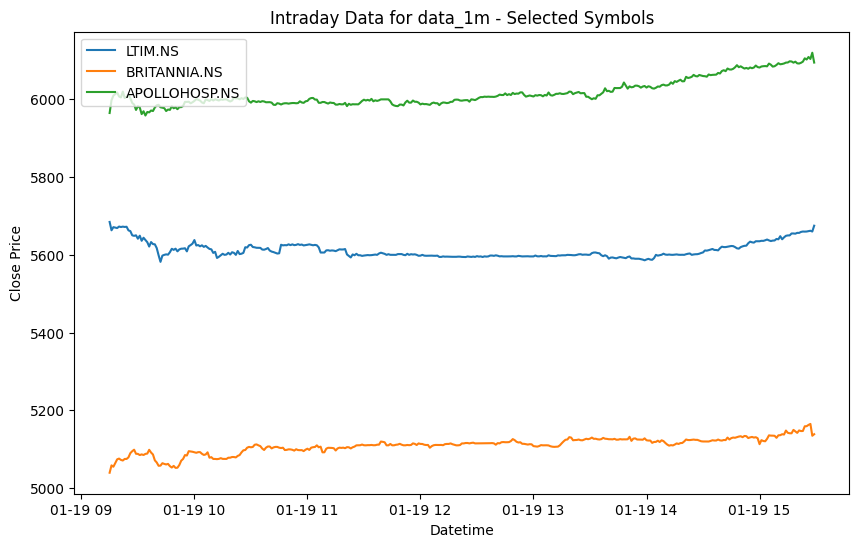

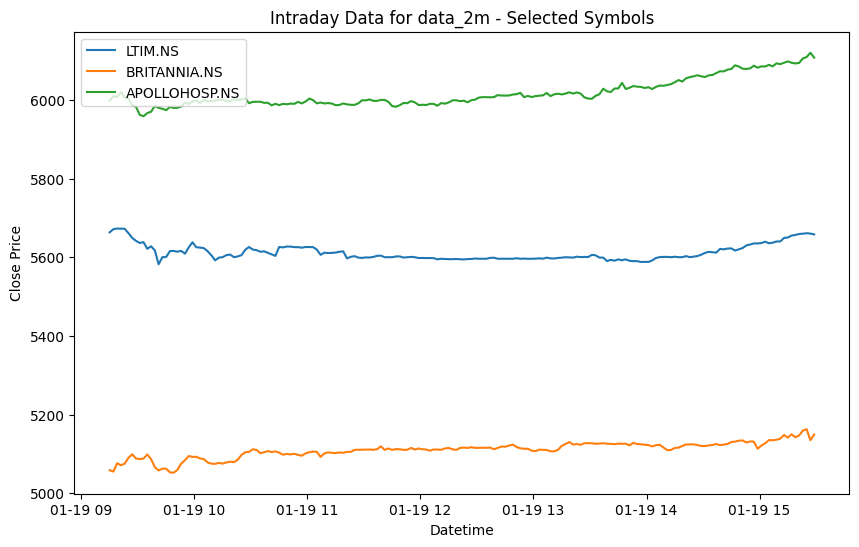

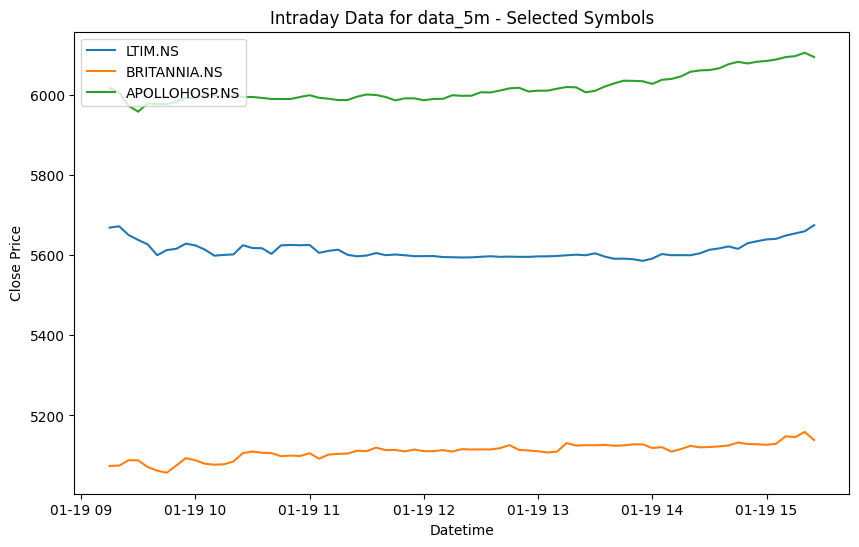

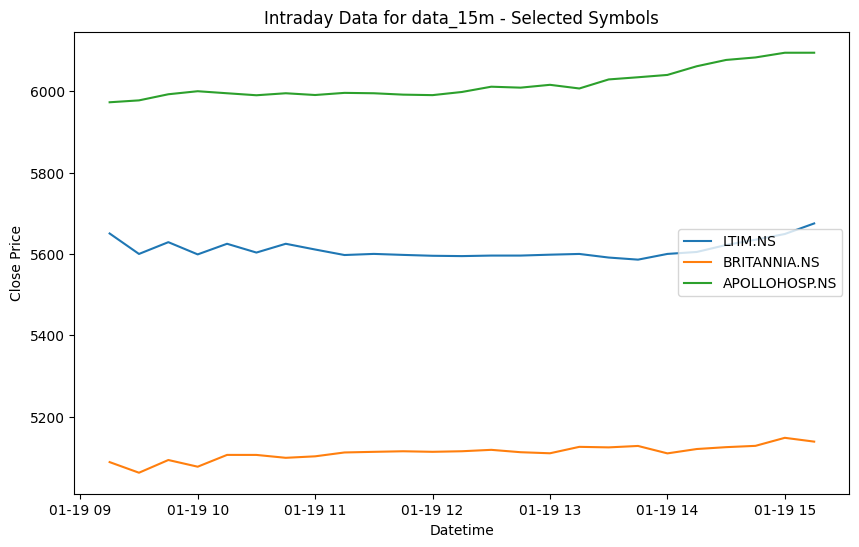

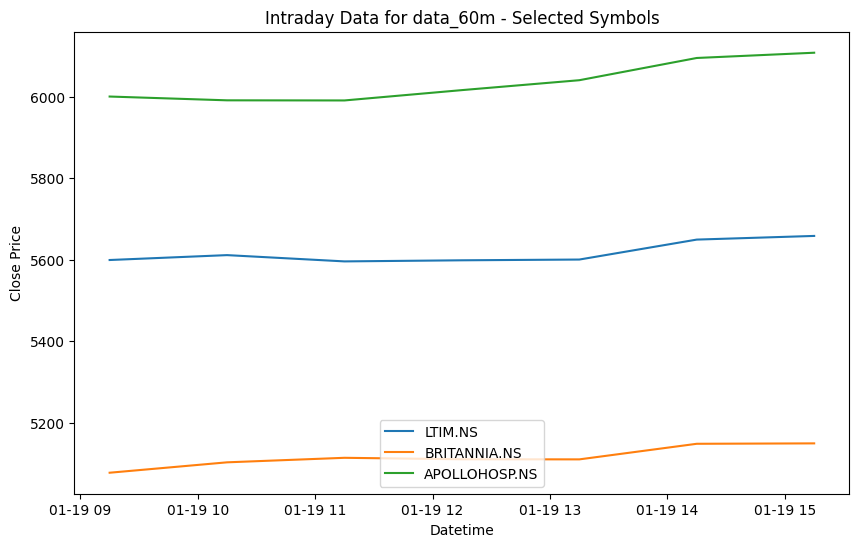

In [11]:
# Plot each DataFrame for the selected symbols
for df_name, df in zip(['data_1m', 'data_2m', 'data_5m', 'data_15m', 'data_60m'], [data_1m, data_2m, data_5m, data_15m, data_60m]):
    plt.figure(figsize=(10, 6))

    for symbol in selected_symbols:
        selected_data = df[df['Symbol'] == symbol]
        plt.plot(selected_data['Datetime'], selected_data['Close'], label=f'{symbol}')

    plt.title(f'Intraday Data for {df_name} - Selected Symbols')
    plt.xlabel('Datetime')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

In [12]:
# Generate statistical descriptions for each DataFrame and selected symbols
for df_name, df in zip(['data_1m', 'data_2m', 'data_5m', 'data_15m', 'data_60m'], [data_1m, data_2m, data_5m, data_15m, data_60m]):
    print(f"\nStatistical Descriptions for {df_name} - Selected Symbols:\n")

    for symbol in selected_symbols:
        selected_data = df[df['Symbol'] == symbol]
        symbol_description = selected_data.describe()

        print(f"\n{symbol}:\n")
        print(symbol_description)


Statistical Descriptions for data_1m - Selected Symbols:


LTIM.NS:

              Open         High          Low        Close        Volume  \
count   374.000000   374.000000   374.000000   374.000000    374.000000   
mean   5611.612699  5614.253487  5609.460148  5611.631948   2520.262032   
std      19.691364    20.542674    19.028440    19.950209   4122.745802   
min    5586.000000  5586.149902  5582.000000  5582.000000      0.000000   
25%    5597.649902  5599.000000  5596.000000  5597.649902    737.250000   
50%    5602.400146  5605.000000  5600.150146  5602.300049   1415.000000   
75%    5621.974976  5624.750000  5620.000000  5622.000000   2764.250000   
max    5680.049805  5691.299805  5680.049805  5684.649902  57820.000000   

       Dividends  Stock Splits  Adj Close  
count      374.0         374.0        0.0  
mean         0.0           0.0        NaN  
std          0.0           0.0        NaN  
min          0.0           0.0        NaN  
25%          0.0           0.0    


Exploratory Data Analysis for data_1m - Selected Symbols:


Summary Statistics for LTIM.NS:

              Open         High          Low        Close        Volume  \
count   374.000000   374.000000   374.000000   374.000000    374.000000   
mean   5611.612699  5614.253487  5609.460148  5611.631948   2520.262032   
std      19.691364    20.542674    19.028440    19.950209   4122.745802   
min    5586.000000  5586.149902  5582.000000  5582.000000      0.000000   
25%    5597.649902  5599.000000  5596.000000  5597.649902    737.250000   
50%    5602.400146  5605.000000  5600.150146  5602.300049   1415.000000   
75%    5621.974976  5624.750000  5620.000000  5622.000000   2764.250000   
max    5680.049805  5691.299805  5680.049805  5684.649902  57820.000000   

       Dividends  Stock Splits  Adj Close  
count      374.0         374.0        0.0  
mean         0.0           0.0        NaN  
std          0.0           0.0        NaN  
min          0.0           0.0        NaN  
25%       

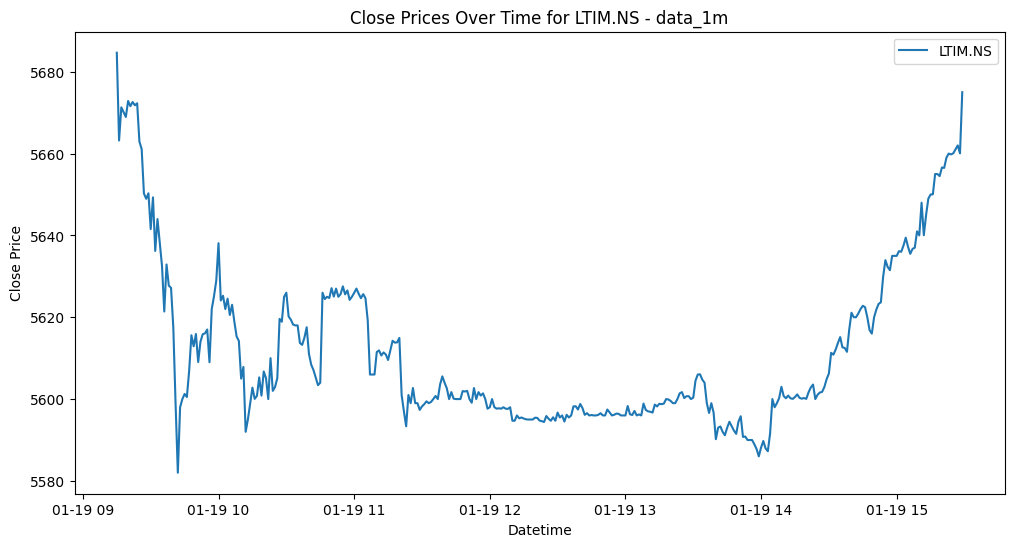

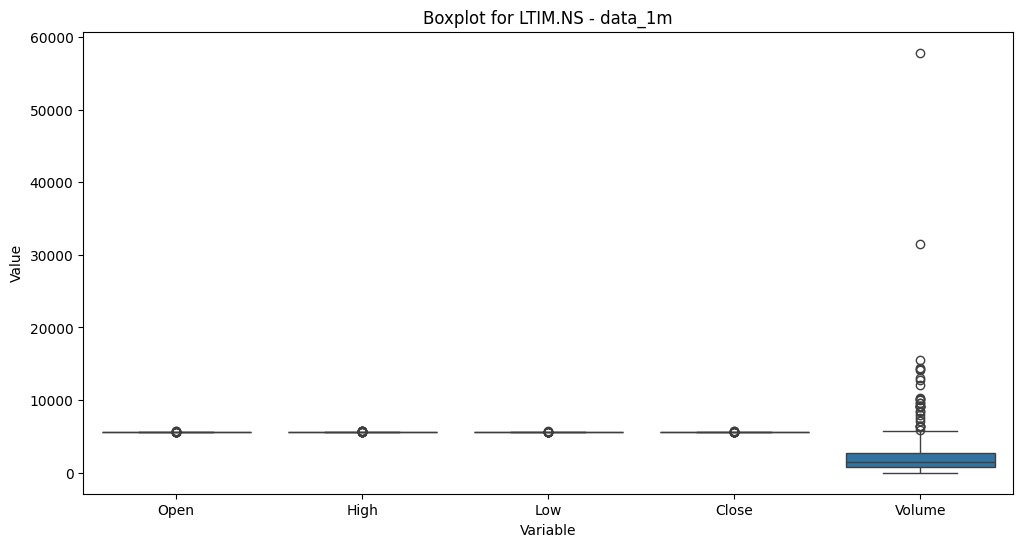


Summary Statistics for BRITANNIA.NS:

              Open         High          Low        Close       Volume  \
count   374.000000   374.000000   374.000000   374.000000   374.000000   
mean   5109.614441  5112.017393  5107.641569  5109.814039   861.855615   
std      20.169811    19.856525    20.606219    19.958843  1146.639372   
min    5035.000000  5043.149902  5013.950195  5039.549805     0.000000   
25%    5101.775146  5104.000000  5099.275024  5102.025024   174.500000   
50%    5111.750000  5114.425049  5110.425049  5111.850098   411.000000   
75%    5123.312622  5124.950195  5121.687500  5123.374878  1021.500000   
max    5165.200195  5165.350098  5162.000000  5165.049805  8949.000000   

       Dividends  Stock Splits  Adj Close  
count      374.0         374.0        0.0  
mean         0.0           0.0        NaN  
std          0.0           0.0        NaN  
min          0.0           0.0        NaN  
25%          0.0           0.0        NaN  
50%          0.0           0.0

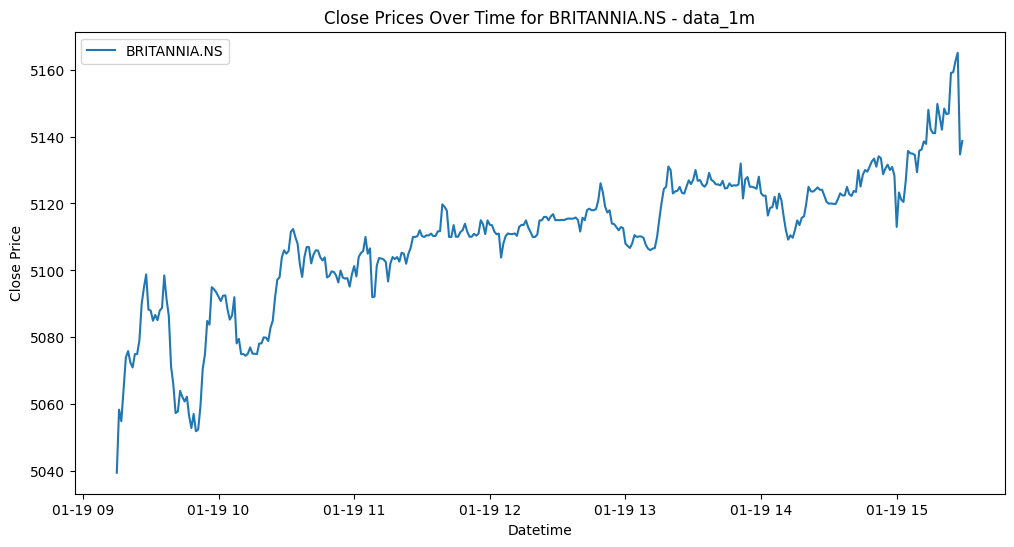

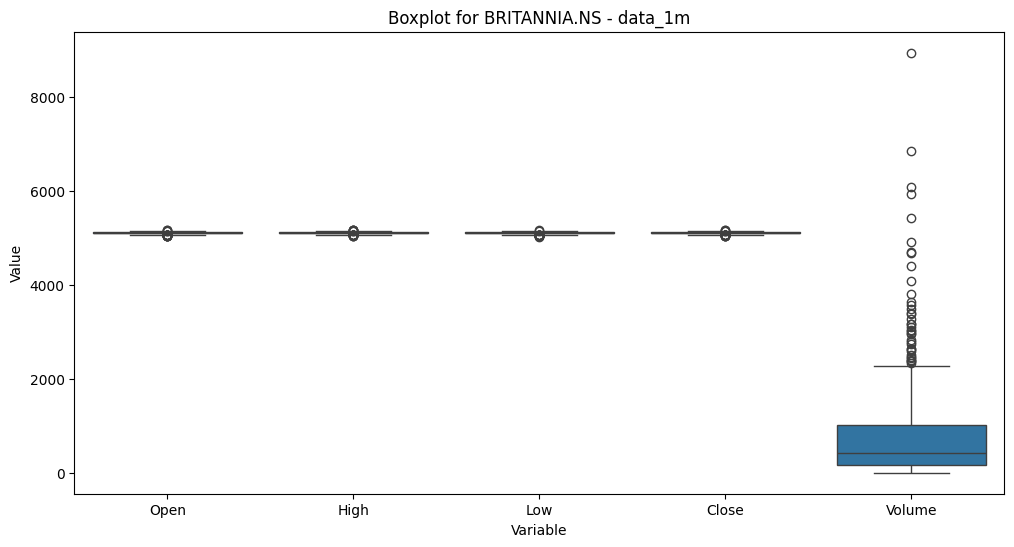


Summary Statistics for APOLLOHOSP.NS:

              Open         High          Low        Close       Volume  \
count   374.000000   374.000000   374.000000   374.000000   374.000000   
mean   6016.166962  6018.999068  6013.950391  6016.629673   851.566845   
std      34.768480    34.991437    34.731583    34.945726   969.583424   
min    5958.450195  5968.049805  5951.049805  5958.450195     0.000000   
25%    5991.712646  5994.137573  5990.399902  5992.000000   196.250000   
50%    6003.125000  6006.000000  6000.375000  6003.350098   478.000000   
75%    6031.949951  6033.675049  6030.000000  6032.437500  1250.000000   
max    6110.000000  6120.000000  6103.000000  6120.000000  7003.000000   

       Dividends  Stock Splits  Adj Close  
count      374.0         374.0        0.0  
mean         0.0           0.0        NaN  
std          0.0           0.0        NaN  
min          0.0           0.0        NaN  
25%          0.0           0.0        NaN  
50%          0.0           0.

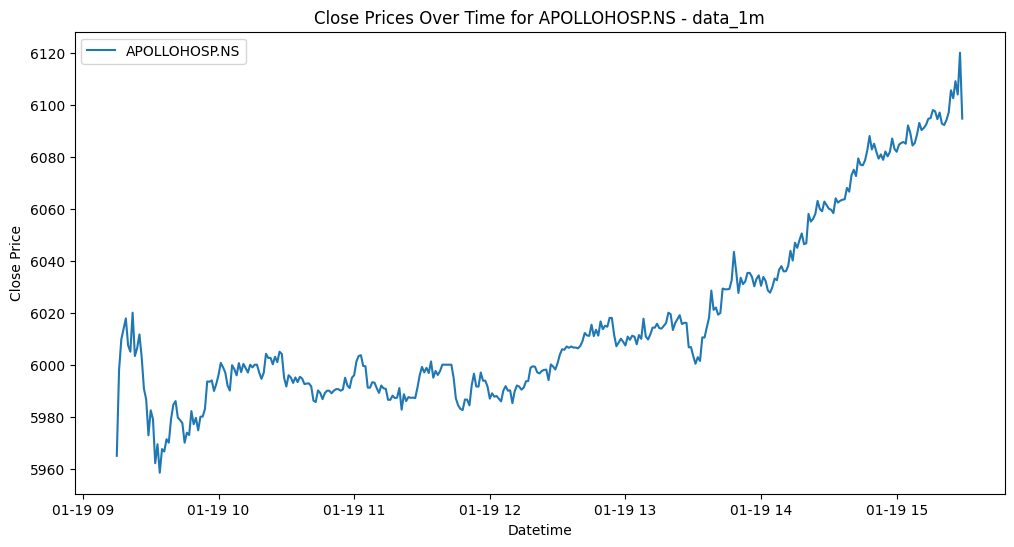

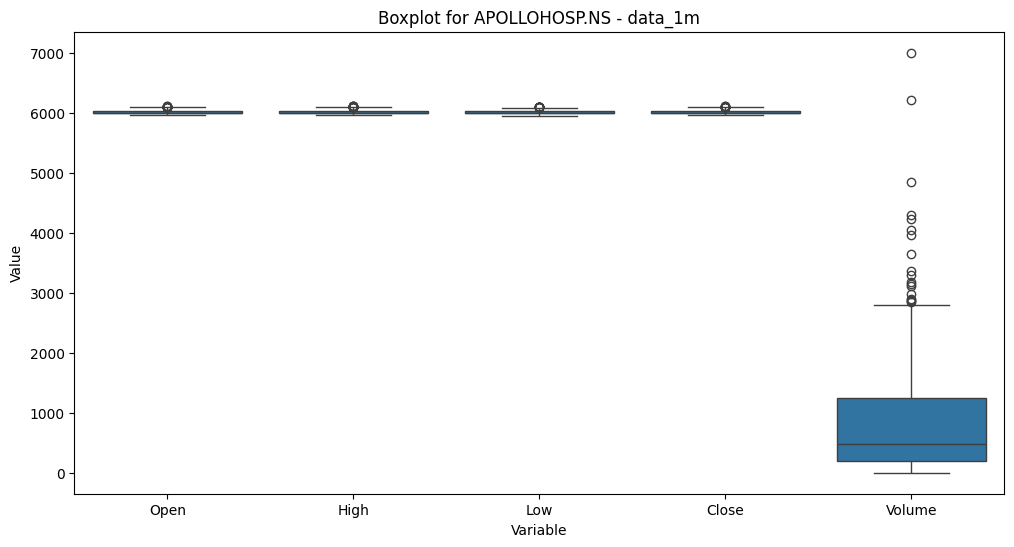


Exploratory Data Analysis for data_2m - Selected Symbols:


Summary Statistics for LTIM.NS:

              Open         High          Low        Close        Volume  \
count   188.000000   188.000000   188.000000   188.000000    188.000000   
mean   5611.781377  5615.668641  5608.646256  5611.687232   5013.712766   
std      20.235905    21.369134    18.927317    19.996797   6428.002272   
min    5586.049805  5590.000000  5582.000000  5582.000000    670.000000   
25%    5597.687622  5600.000000  5596.000000  5597.937500   1782.750000   
50%    5602.000000  5606.149902  5600.000000  5602.000000   3367.000000   
75%    5622.000000  5626.112549  5617.499878  5622.600098   5680.000000   
max    5680.049805  5691.299805  5666.149902  5672.850098  64286.000000   

       Dividends  Stock Splits  Adj Close  
count      188.0         188.0        0.0  
mean         0.0           0.0        NaN  
std          0.0           0.0        NaN  
min          0.0           0.0        NaN  
25%       

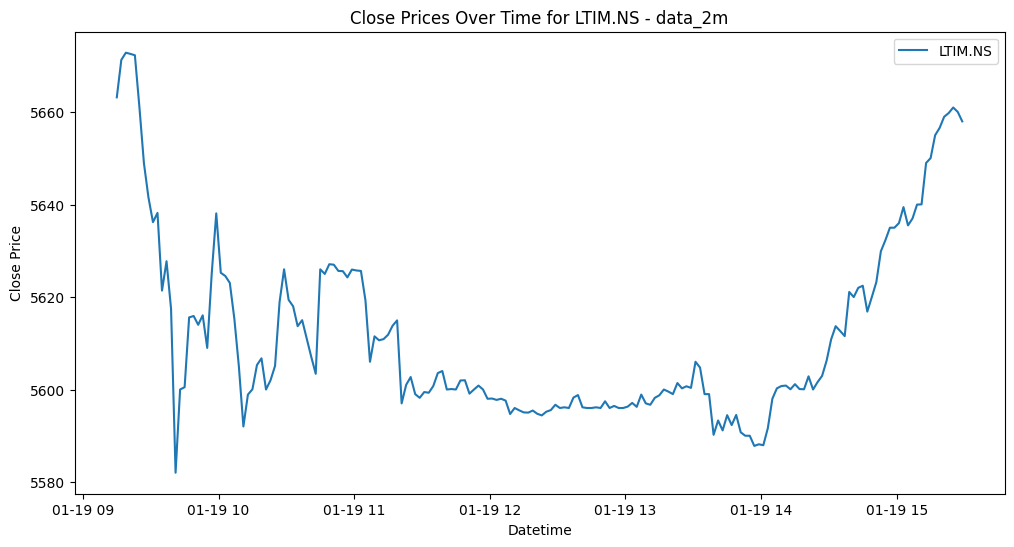

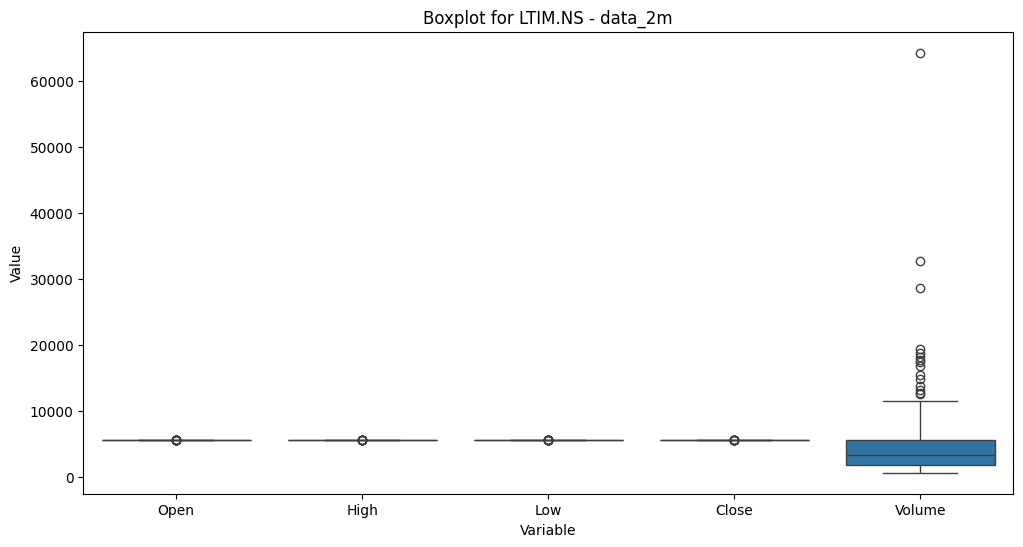


Summary Statistics for BRITANNIA.NS:

              Open         High          Low        Close        Volume  \
count   188.000000   188.000000   188.000000   188.000000    188.000000   
mean   5109.368338  5113.156141  5106.381363  5109.858778   1714.542553   
std      20.343612    19.764176    21.112789    20.059524   2037.263650   
min    5035.000000  5059.399902  5013.950195  5051.950195     94.000000   
25%    5101.837524  5104.949951  5096.537354  5102.375000    514.000000   
50%    5111.875000  5114.950195  5110.024902  5111.600098    956.000000   
75%    5123.237671  5125.162476  5121.062378  5123.137329   1828.500000   
max    5162.549805  5165.350098  5151.600098  5162.549805  12803.000000   

       Dividends  Stock Splits  Adj Close  
count      188.0         188.0        0.0  
mean         0.0           0.0        NaN  
std          0.0           0.0        NaN  
min          0.0           0.0        NaN  
25%          0.0           0.0        NaN  
50%          0.0     

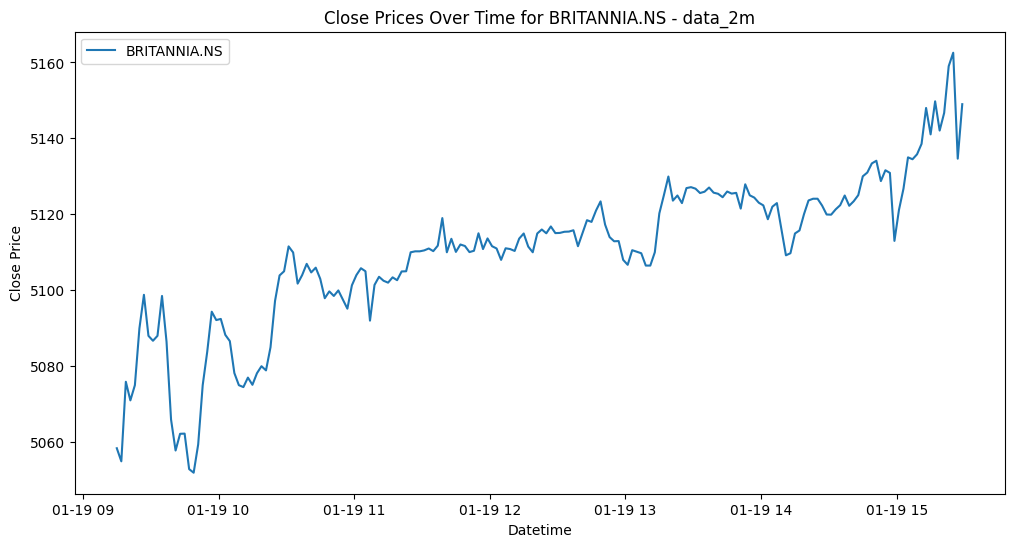

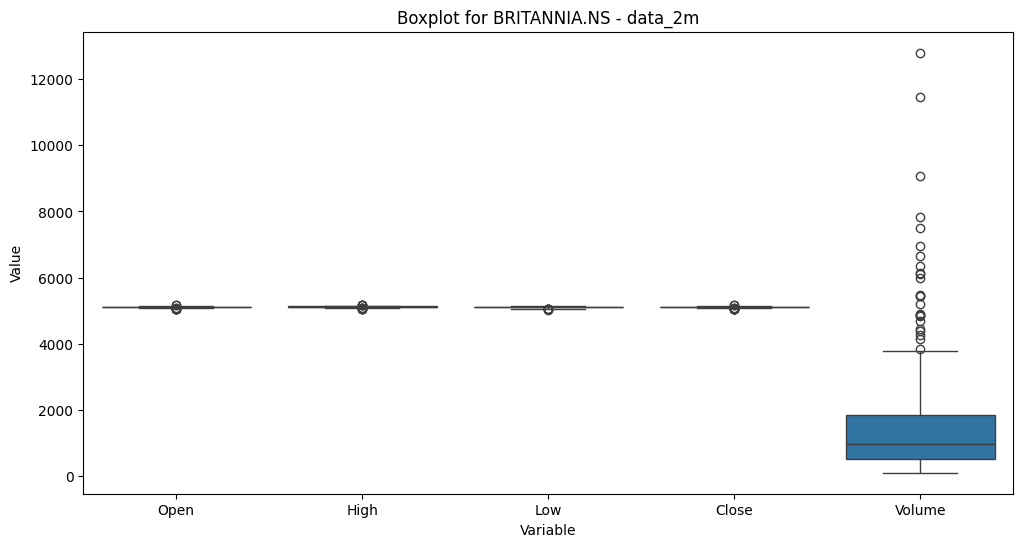


Summary Statistics for APOLLOHOSP.NS:

              Open         High          Low        Close        Volume  \
count   188.000000   188.000000   188.000000   188.000000    188.000000   
mean   6016.191482  6020.536437  6012.917556  6017.172605   1694.074468   
std      34.843574    35.325516    35.023707    35.493009   1609.270066   
min    5958.450195  5970.000000  5951.049805  5958.450195     67.000000   
25%    5991.837524  5995.075073  5989.000000  5992.000000    548.500000   
50%    6003.300049  6007.000000  6000.000000  6003.324951   1076.000000   
75%    6031.250000  6034.699951  6029.062500  6032.449951   2474.000000   
max    6110.000000  6120.000000  6098.149902  6120.000000  11307.000000   

       Dividends  Stock Splits  Adj Close  
count      188.0         188.0        0.0  
mean         0.0           0.0        NaN  
std          0.0           0.0        NaN  
min          0.0           0.0        NaN  
25%          0.0           0.0        NaN  
50%          0.0    

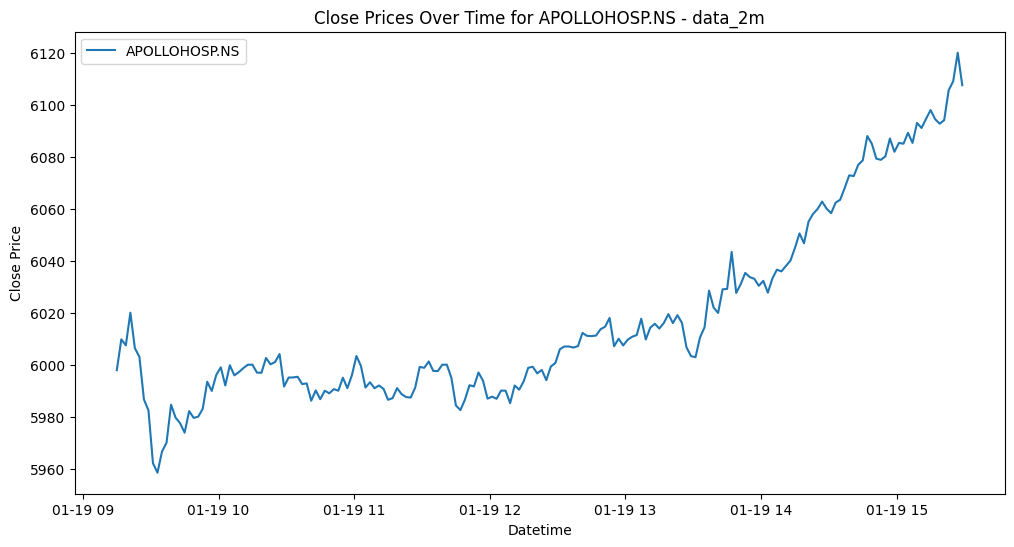

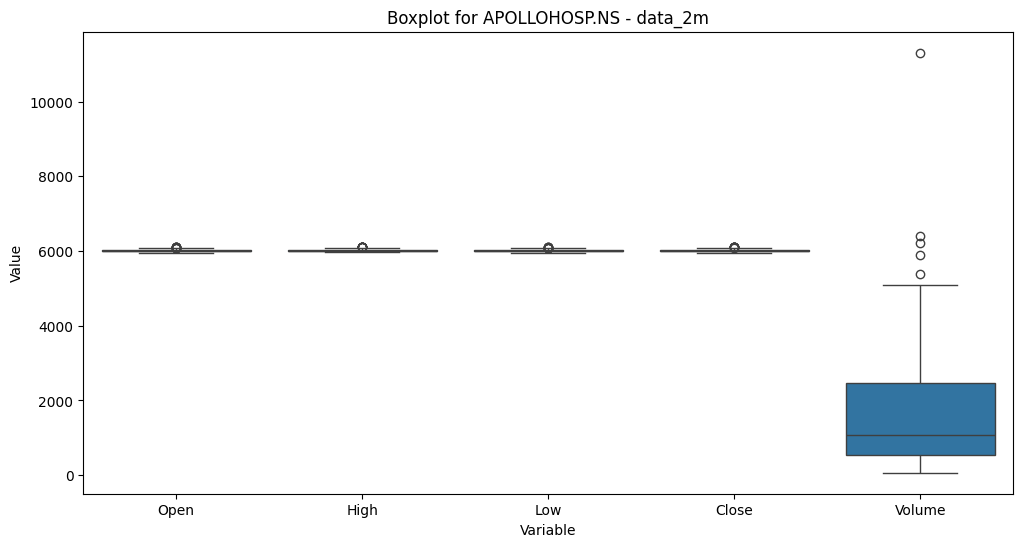


Exploratory Data Analysis for data_5m - Selected Symbols:


Summary Statistics for LTIM.NS:

              Open         High          Low        Close        Volume  \
count    75.000000    75.000000    75.000000    75.000000     75.000000   
mean   5612.257982  5617.886022  5606.605964  5612.179993  12048.560000   
std      20.620065    21.933935    18.059209    20.733655  12768.654823   
min    5586.000000  5590.399902  5582.000000  5586.000000      0.000000   
25%    5597.475098  5601.375000  5595.175049  5597.550049   5112.500000   
50%    5602.049805  5609.950195  5600.000000  5602.000000   7563.000000   
75%    5623.100098  5627.650146  5614.225098  5624.625000  14358.000000   
max    5680.049805  5691.299805  5660.049805  5675.000000  89319.000000   

       Dividends  Stock Splits  Adj Close  
count       75.0          75.0        0.0  
mean         0.0           0.0        NaN  
std          0.0           0.0        NaN  
min          0.0           0.0        NaN  
25%       

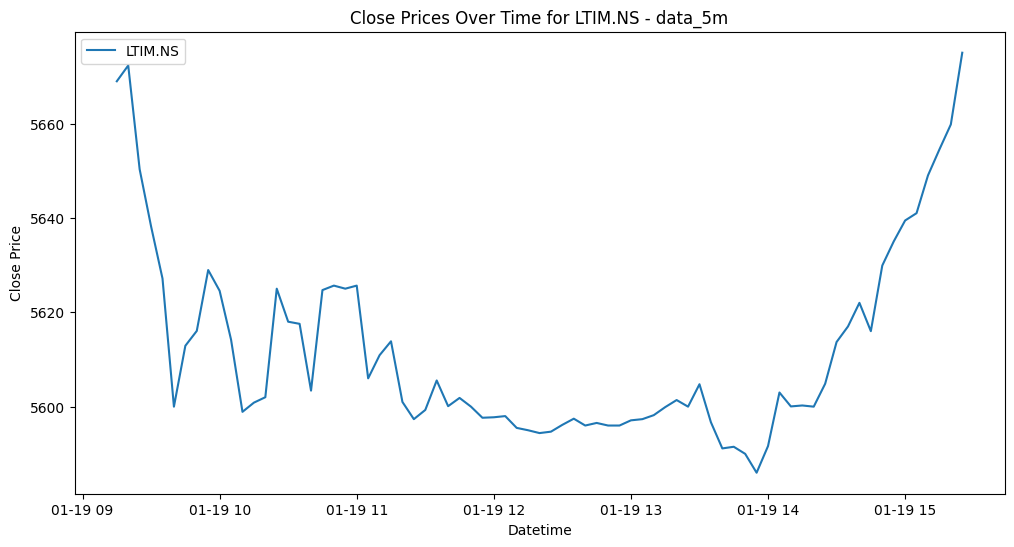

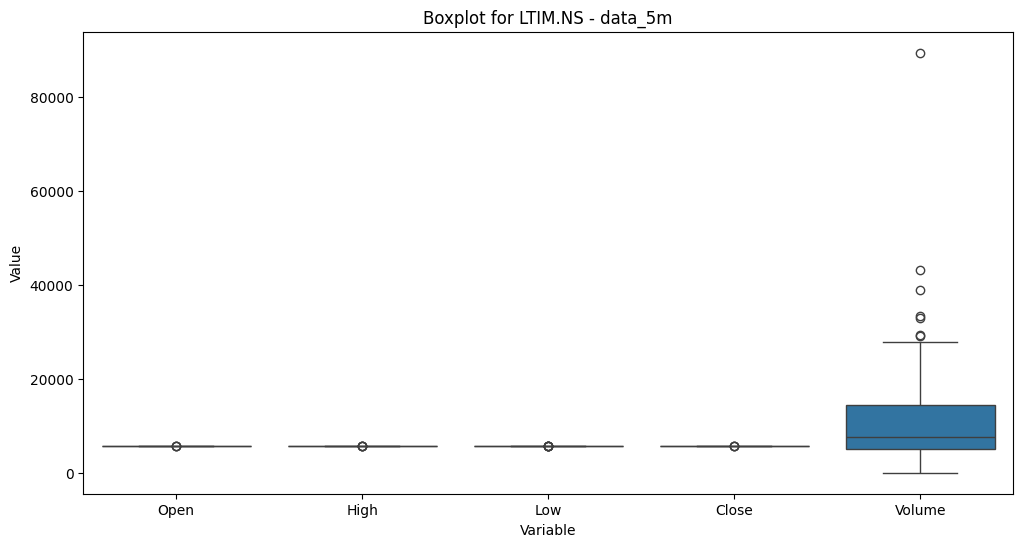


Summary Statistics for BRITANNIA.NS:

              Open         High          Low        Close        Volume  \
count    75.000000    75.000000    75.000000    75.000000     75.000000   
mean   5109.230020  5115.411361  5103.711322  5110.479342   4143.293333   
std      21.206485    18.997341    22.702922    19.641459   3986.228441   
min    5035.000000  5069.450195  5013.950195  5057.100098      0.000000   
25%    5102.500000  5107.000000  5093.449951  5103.250000   1594.000000   
50%    5111.049805  5115.700195  5110.000000  5113.549805   2682.000000   
75%    5123.925049  5127.149902  5119.875000  5124.725098   4892.500000   
max    5159.049805  5165.350098  5142.049805  5159.000000  18240.000000   

       Dividends  Stock Splits  Adj Close  
count       75.0          75.0        0.0  
mean         0.0           0.0        NaN  
std          0.0           0.0        NaN  
min          0.0           0.0        NaN  
25%          0.0           0.0        NaN  
50%          0.0     

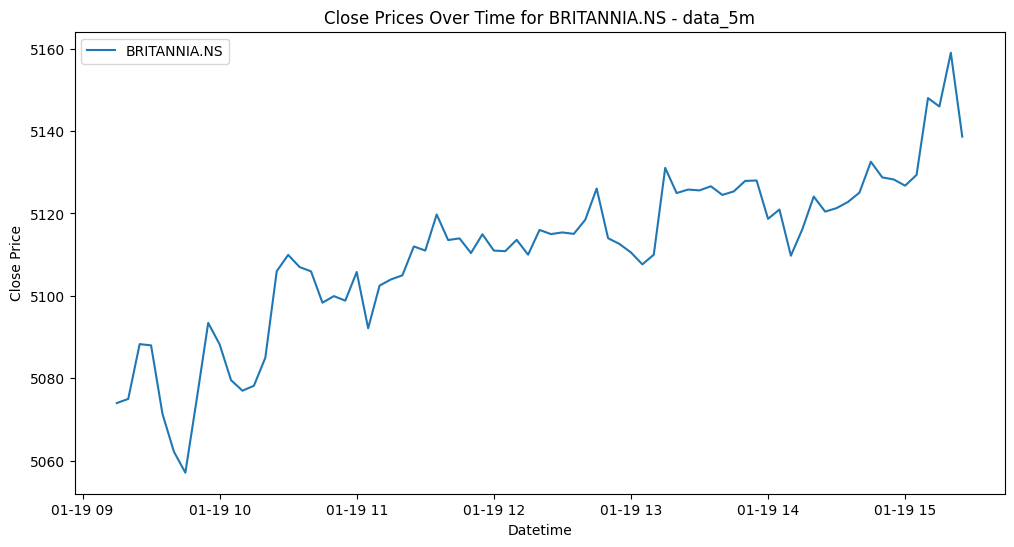

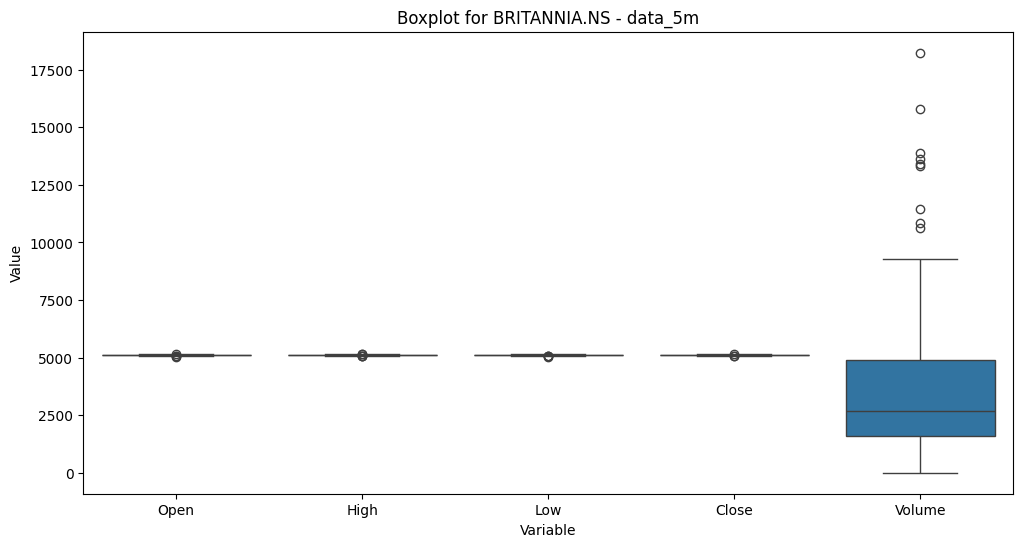


Summary Statistics for APOLLOHOSP.NS:

              Open         High          Low        Close        Volume  \
count    75.000000    75.000000    75.000000    75.000000     75.000000   
mean   6015.374655  6022.528672  6010.334017  6017.165313   4013.800000   
std      34.656112    35.004841    35.605545    35.321004   3233.584899   
min    5958.450195  5980.000000  5951.049805  5958.450195      0.000000   
25%    5991.724854  5996.950195  5988.050049  5992.274902   1479.500000   
50%    6001.200195  6010.700195  5996.350098  6006.299805   3054.000000   
75%    6029.750000  6036.075195  6025.550049  6034.824951   5766.000000   
max    6104.950195  6120.000000  6094.649902  6105.549805  14586.000000   

       Dividends  Stock Splits  Adj Close  
count       75.0          75.0        0.0  
mean         0.0           0.0        NaN  
std          0.0           0.0        NaN  
min          0.0           0.0        NaN  
25%          0.0           0.0        NaN  
50%          0.0    

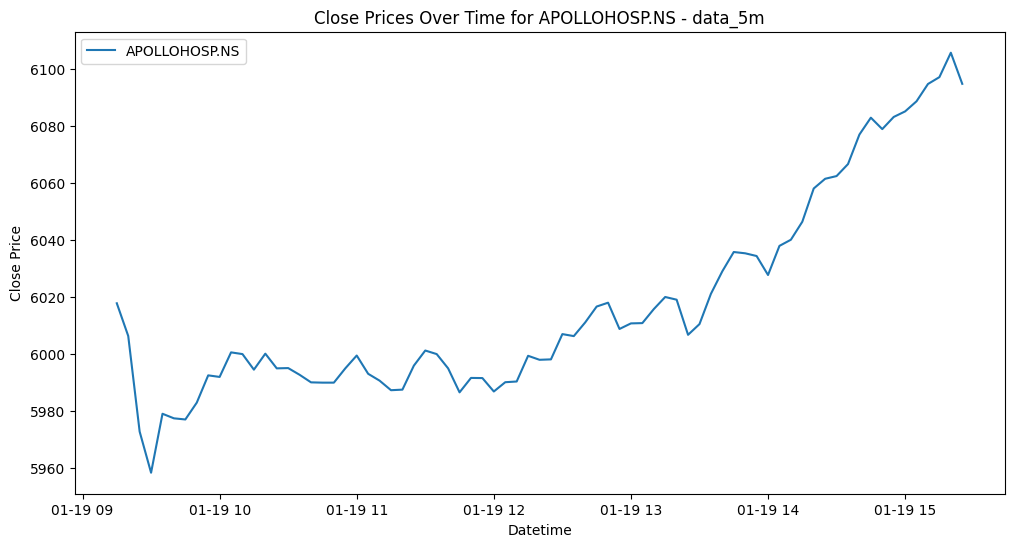

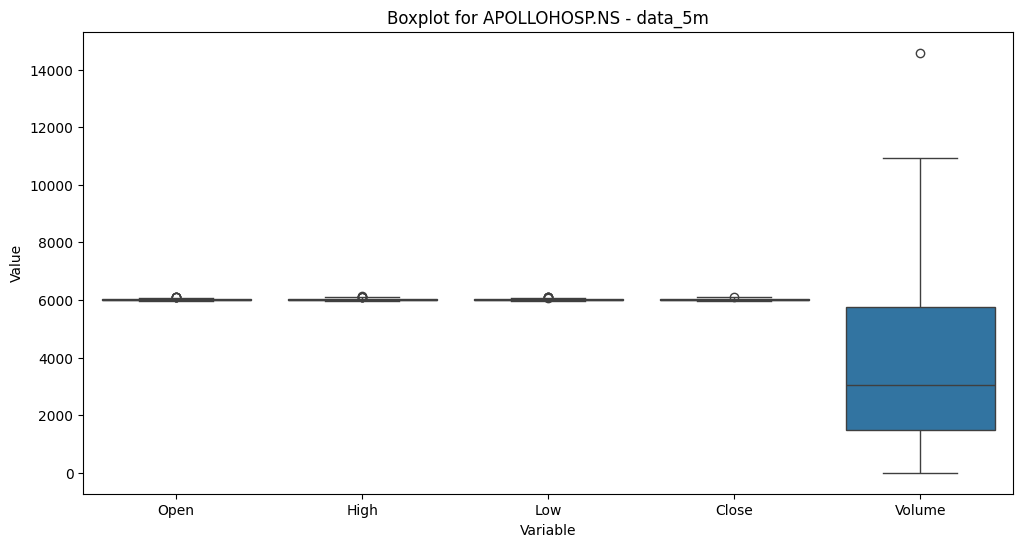


Exploratory Data Analysis for data_15m - Selected Symbols:


Summary Statistics for LTIM.NS:

              Open         High          Low        Close         Volume  \
count    25.000000    25.000000    25.000000    25.000000      25.000000   
mean   5611.511973  5622.565996  5600.939941  5611.240000   36145.680000   
std      22.485843    24.853369    16.831081    22.098552   27661.316266   
min    5586.000000  5596.750000  5582.000000  5586.000000   10809.000000   
25%    5597.700195  5604.000000  5592.049805  5597.350098   16661.000000   
50%    5600.049805  5618.649902  5595.200195  5600.049805   25239.000000   
75%    5622.950195  5629.600098  5603.049805  5625.000000   49639.000000   
max    5680.049805  5691.299805  5646.000000  5675.000000  122262.000000   

       Dividends  Stock Splits  Adj Close  
count       25.0          25.0        0.0  
mean         0.0           0.0        NaN  
std          0.0           0.0        NaN  
min          0.0           0.0        NaN  


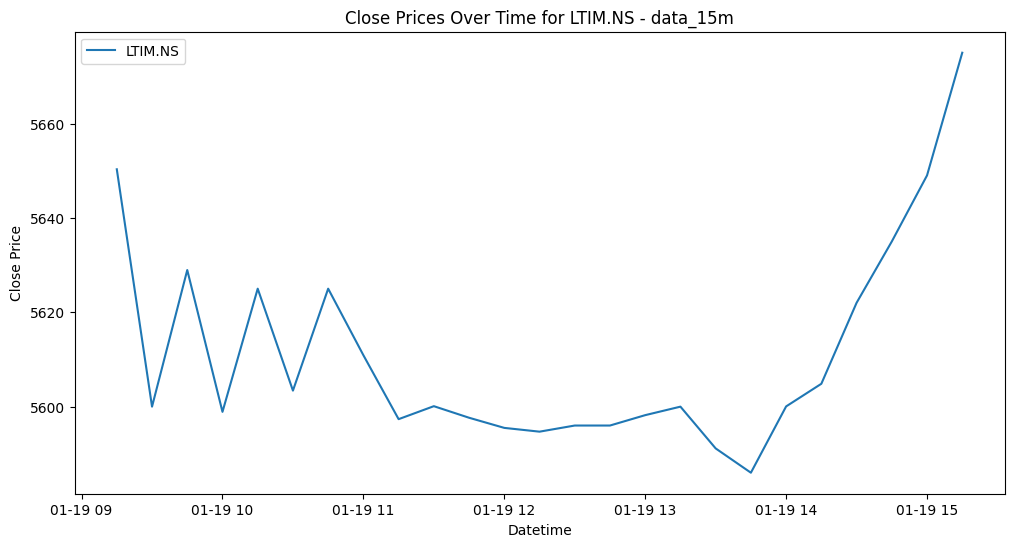

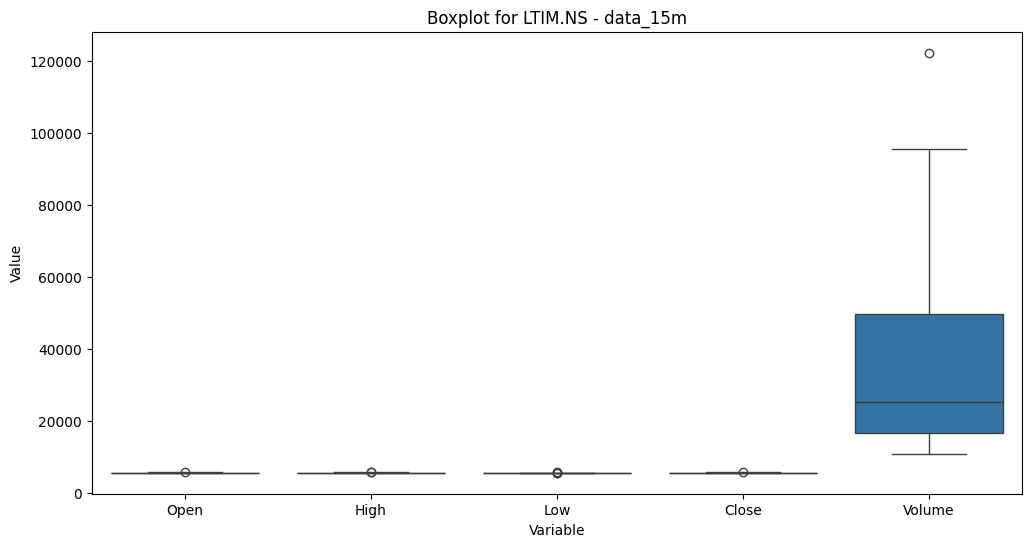


Summary Statistics for BRITANNIA.NS:

              Open         High          Low        Close        Volume  \
count    25.000000    25.000000    25.000000    25.000000     25.000000   
mean   5107.846016  5120.974023  5097.870000  5111.714023  12429.880000   
std      22.771650    15.836003    27.104570    18.408447  10518.436074   
min    5035.000000  5098.799805  5013.950195  5062.200195   3024.000000   
25%    5104.399902  5110.899902  5092.000000  5105.950195   5665.000000   
50%    5112.000000  5118.950195  5106.250000  5113.549805   8756.000000   
75%    5120.450195  5130.000000  5111.600098  5124.500000  17026.000000   
max    5147.950195  5165.350098  5132.450195  5148.000000  47932.000000   

       Dividends  Stock Splits  Adj Close  
count       25.0          25.0        0.0  
mean         0.0           0.0        NaN  
std          0.0           0.0        NaN  
min          0.0           0.0        NaN  
25%          0.0           0.0        NaN  
50%          0.0     

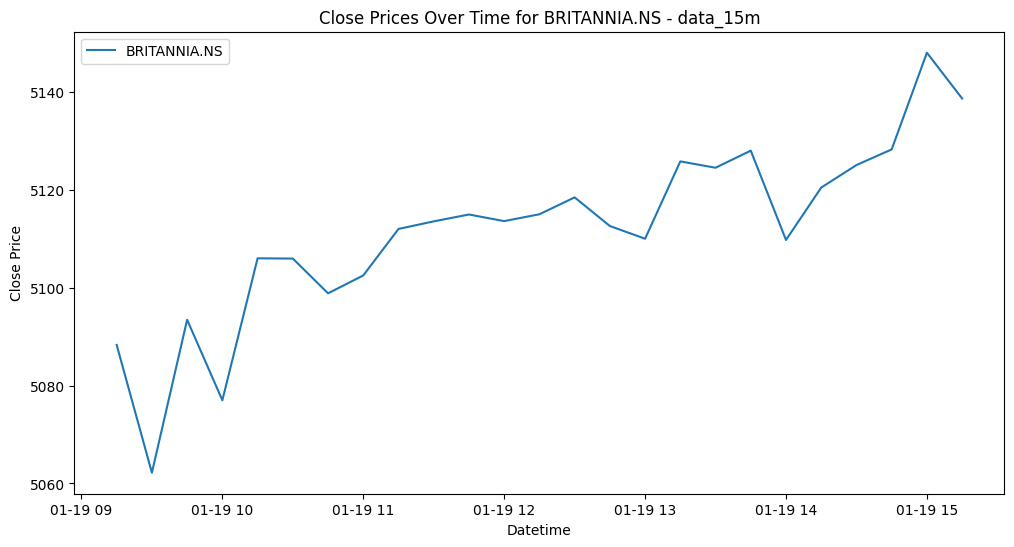

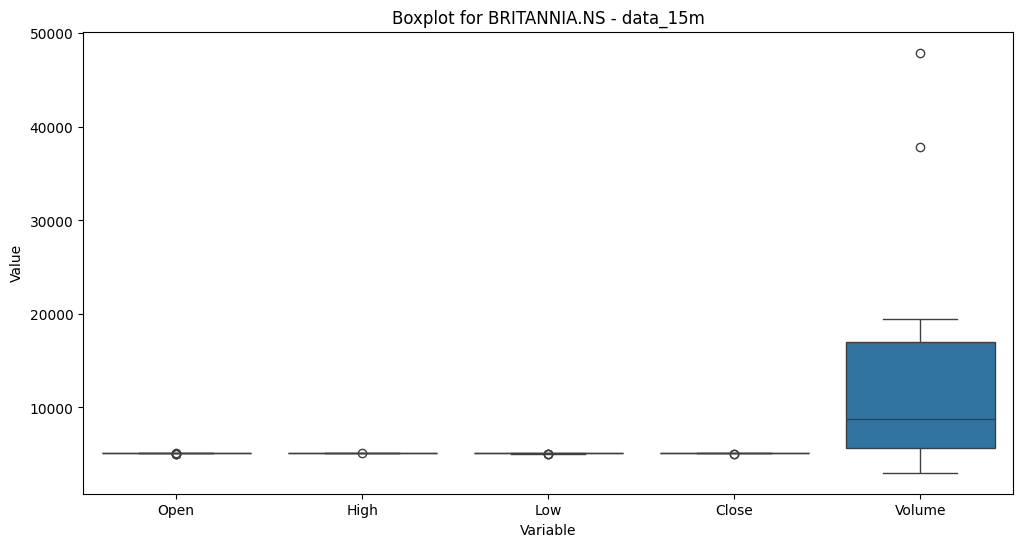


Summary Statistics for APOLLOHOSP.NS:

              Open         High          Low        Close        Volume  \
count    25.000000    25.000000    25.000000    25.000000     25.000000   
mean   6012.659961  6026.181992  6006.052012  6017.647988  12041.400000   
std      34.573518    36.385239    36.333086    36.834319   8357.561397   
min    5970.250000  5989.000000  5951.049805  5972.850098   3271.000000   
25%    5991.600098  5998.600098  5985.000000  5992.549805   4435.000000   
50%    5998.600098  6017.000000  5995.000000  6000.000000   9349.000000   
75%    6027.500000  6043.399902  6020.000000  6034.350098  18945.000000   
max    6094.350098  6120.000000  6092.100098  6094.649902  30322.000000   

       Dividends  Stock Splits  Adj Close  
count       25.0          25.0        0.0  
mean         0.0           0.0        NaN  
std          0.0           0.0        NaN  
min          0.0           0.0        NaN  
25%          0.0           0.0        NaN  
50%          0.0    

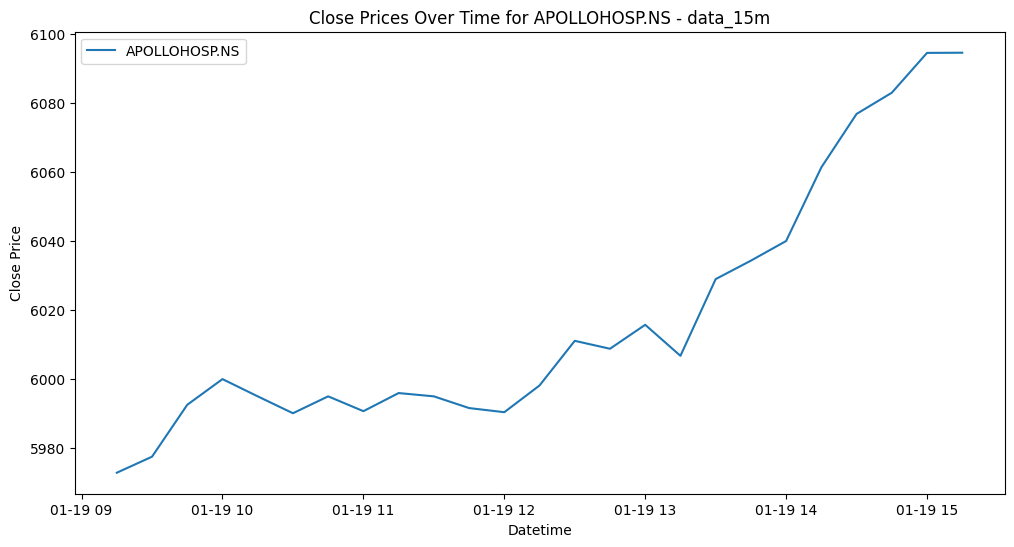

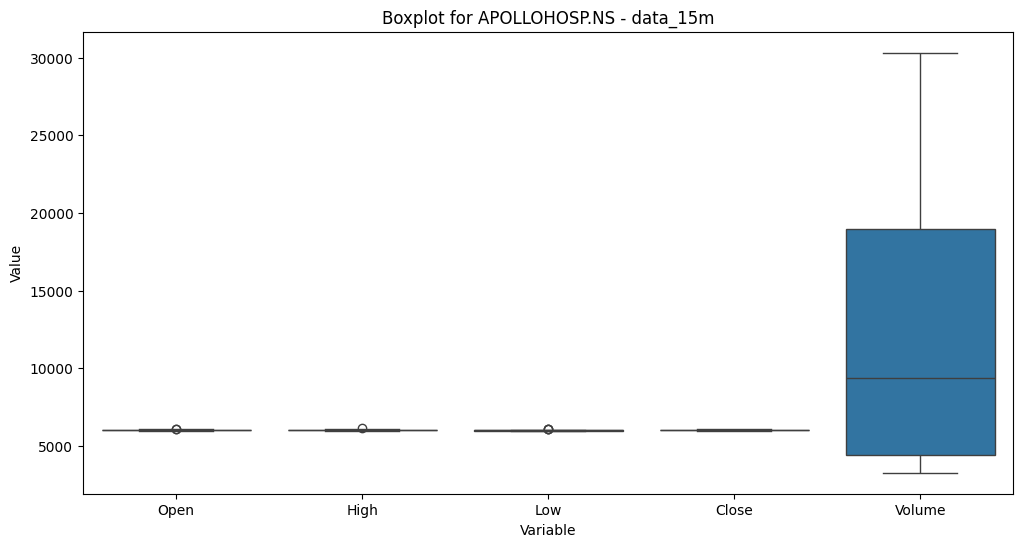


Exploratory Data Analysis for data_60m - Selected Symbols:


Summary Statistics for LTIM.NS:

              Open         High          Low        Close         Volume  \
count     7.000000     7.000000     7.000000     7.000000       7.000000   
mean   5618.978516  5639.457171  5598.657087  5615.792829   89096.000000   
std      32.610464    34.420757    21.936099    26.339500   51347.480113   
min    5595.450195  5601.450195  5582.000000  5595.500000       0.000000   
25%    5598.949951  5613.175049  5587.074951  5598.550049   72040.000000   
50%    5600.049805  5629.600098  5592.049805  5600.049805   95423.000000   
75%    5629.699951  5663.750000  5598.199951  5629.949951  107250.500000   
max    5680.049805  5691.299805  5646.000000  5658.000000  169668.000000   

       Dividends  Stock Splits  Adj Close  
count        7.0           7.0        0.0  
mean         0.0           0.0        NaN  
std          0.0           0.0        NaN  
min          0.0           0.0        NaN  


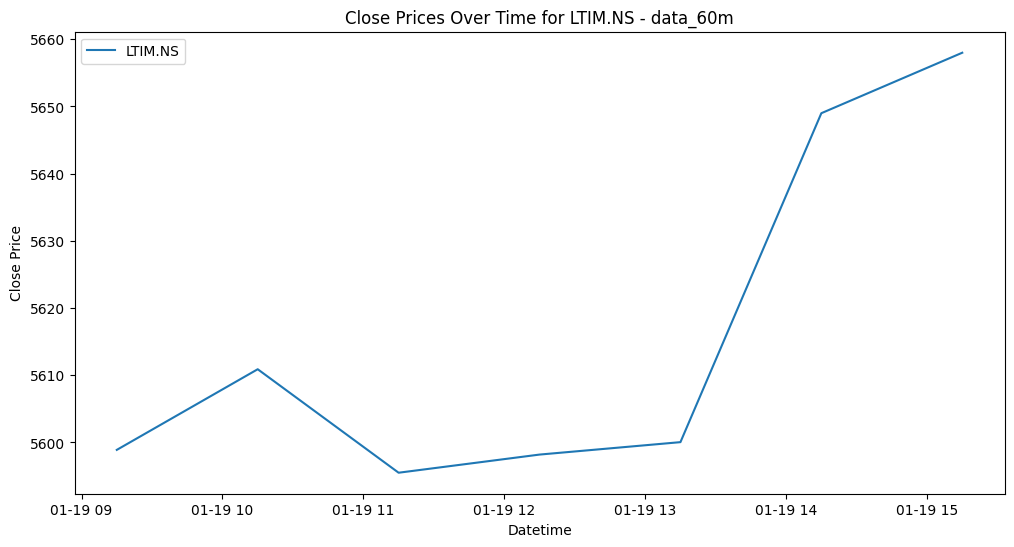

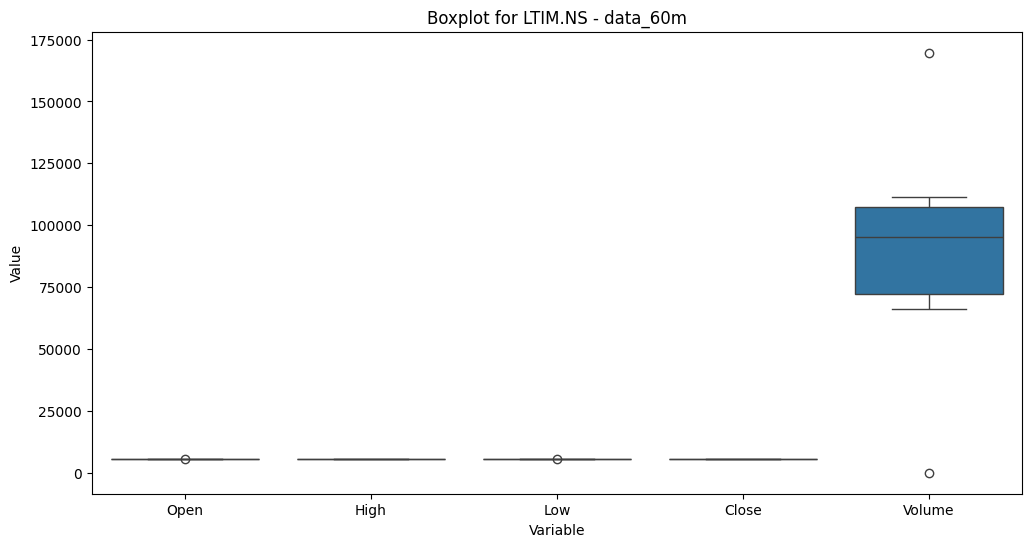


Summary Statistics for BRITANNIA.NS:

              Open         High          Low        Close        Volume  \
count     7.000000     7.000000     7.000000     7.000000      7.000000   
mean   5099.800014  5131.557129  5091.400042  5115.692871  36667.142857   
std      35.287234    20.930536    38.264763    25.483366  24377.978447   
min    5035.000000  5104.799805  5013.950195  5077.000000      0.000000   
25%    5090.699951  5117.475098  5085.500000  5106.125000  28290.500000   
50%    5109.750000  5129.899902  5104.250000  5110.000000  37823.000000   
75%    5112.250000  5142.949951  5109.074951  5130.800049  40232.500000   
max    5147.950195  5165.350098  5132.450195  5149.000000  81801.000000   

       Dividends  Stock Splits  Adj Close  
count        7.0           7.0        0.0  
mean         0.0           0.0        NaN  
std          0.0           0.0        NaN  
min          0.0           0.0        NaN  
25%          0.0           0.0        NaN  
50%          0.0     

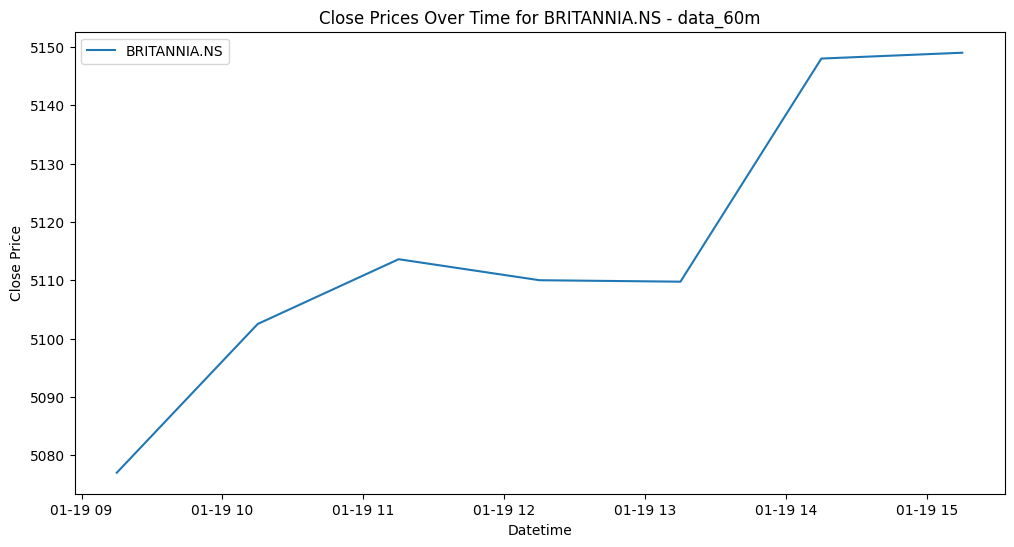

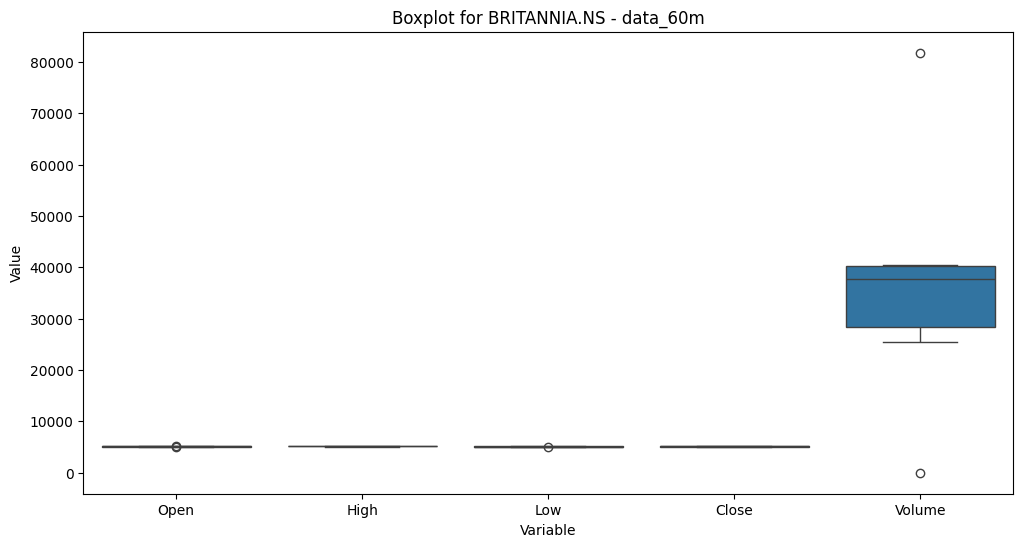


Summary Statistics for APOLLOHOSP.NS:

              Open         High          Low        Close        Volume  \
count     7.000000     7.000000     7.000000     7.000000      7.000000   
mean   6014.264230  6044.614188  6005.692871  6034.142857  33120.857143   
std      41.853584    45.972379    46.434026    48.948924  28250.937126   
min    5970.250000  6004.000000  5951.049805  5990.399902      0.000000   
25%    5989.724854  6013.574951  5983.050049  5995.350098  22956.000000   
50%    5998.600098  6020.299805  5990.399902  6015.750000  23463.000000   
75%    6028.599854  6070.424805  6020.100098  6067.324951  35889.500000   
max    6094.350098  6120.000000  6092.100098  6107.500000  90692.000000   

       Dividends  Stock Splits  Adj Close  
count        7.0           7.0        0.0  
mean         0.0           0.0        NaN  
std          0.0           0.0        NaN  
min          0.0           0.0        NaN  
25%          0.0           0.0        NaN  
50%          0.0    

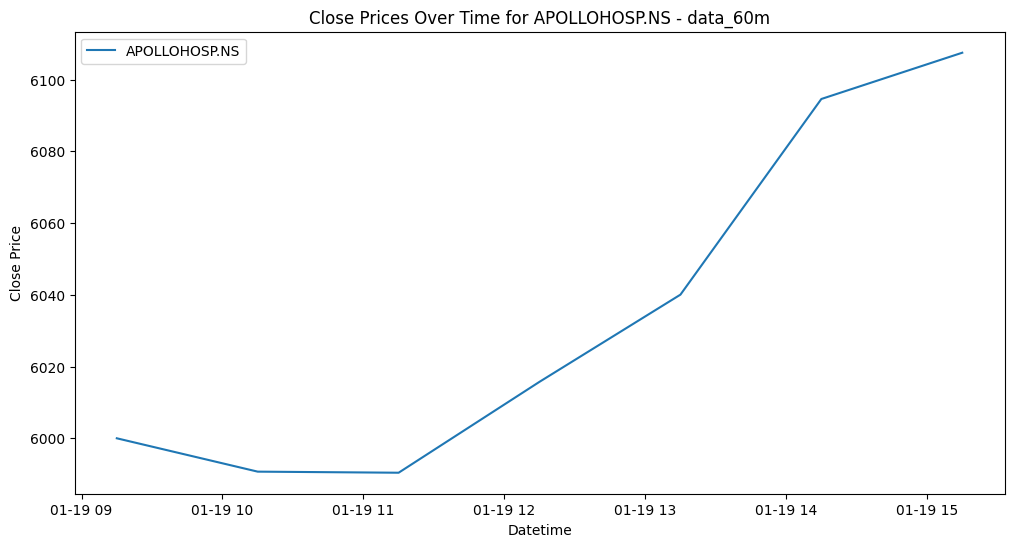

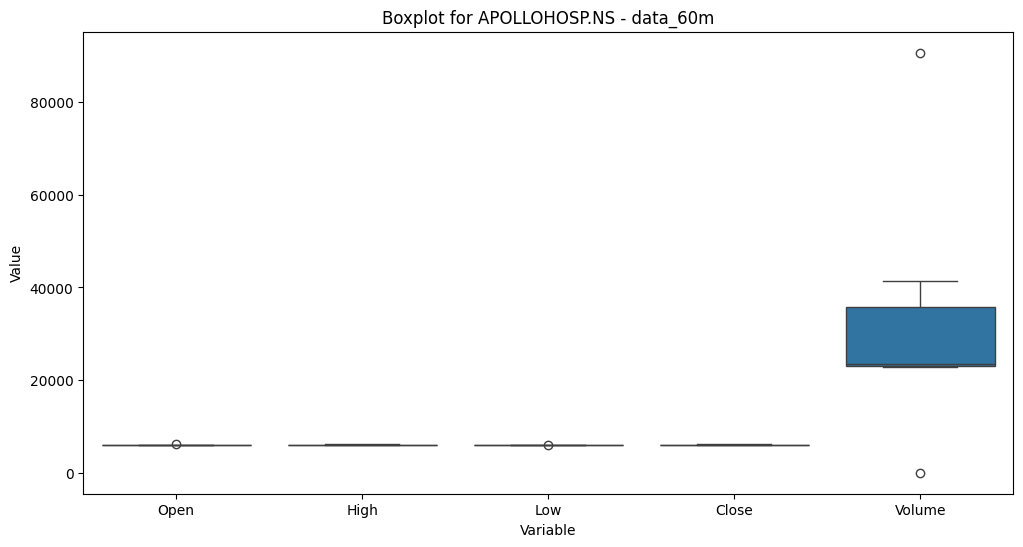

In [13]:
# Define the columns of interests
columns_of_interest = ['Open', 'High', 'Low', 'Close', 'Volume']

# EDA for each DataFrame and selected symbols
for df_name, df in zip(['data_1m', 'data_2m', 'data_5m', 'data_15m', 'data_60m'], [data_1m, data_2m, data_5m, data_15m, data_60m]):
    print(f"\nExploratory Data Analysis for {df_name} - Selected Symbols:\n")

    for symbol in selected_symbols:
        selected_data = df[df['Symbol'] == symbol]

        # Summary statistics
        print(f"\nSummary Statistics for {symbol}:\n")
        print(selected_data.describe())

        # Line plot for close prices over time
        plt.figure(figsize=(12, 6))
        sns.lineplot(x='Datetime', y='Close', data=selected_data, label=f'{symbol}')
        plt.title(f'Close Prices Over Time for {symbol} - {df_name}')
        plt.xlabel('Datetime')
        plt.ylabel('Close Price')
        plt.legend()
        plt.show()

        # Boxplot for each numerical column
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='variable', y='value', data=pd.melt(selected_data[columns_of_interest]))
        plt.title(f'Boxplot for {symbol} - {df_name}')
        plt.xlabel('Variable')
        plt.ylabel('Value')
        plt.show()



Correlation Heatmap for data_1m - Selected Symbols:



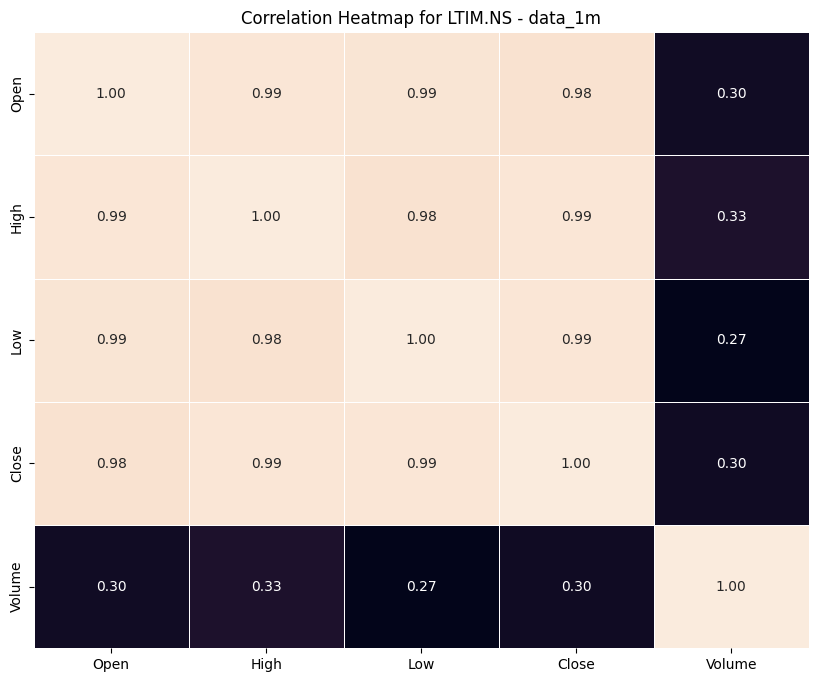

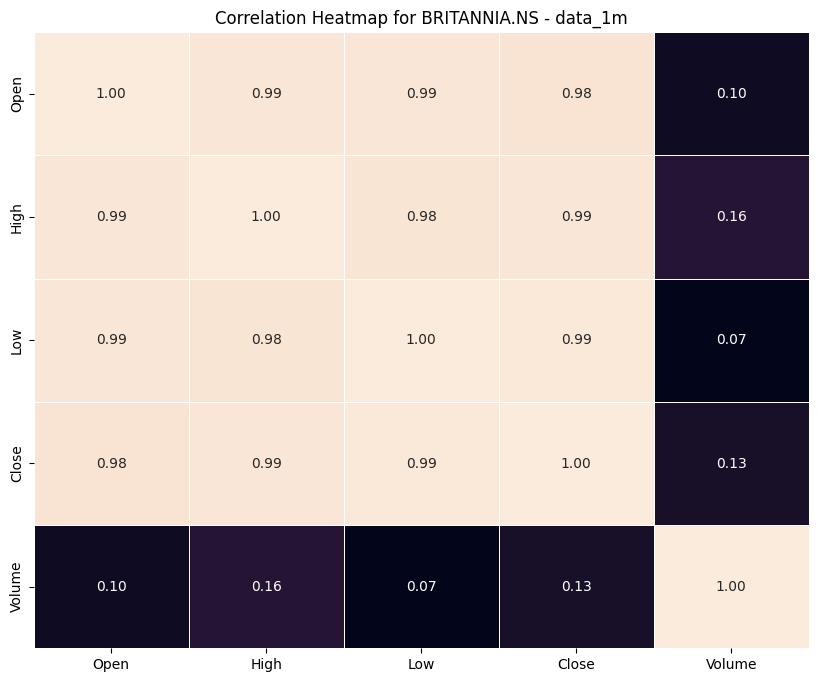

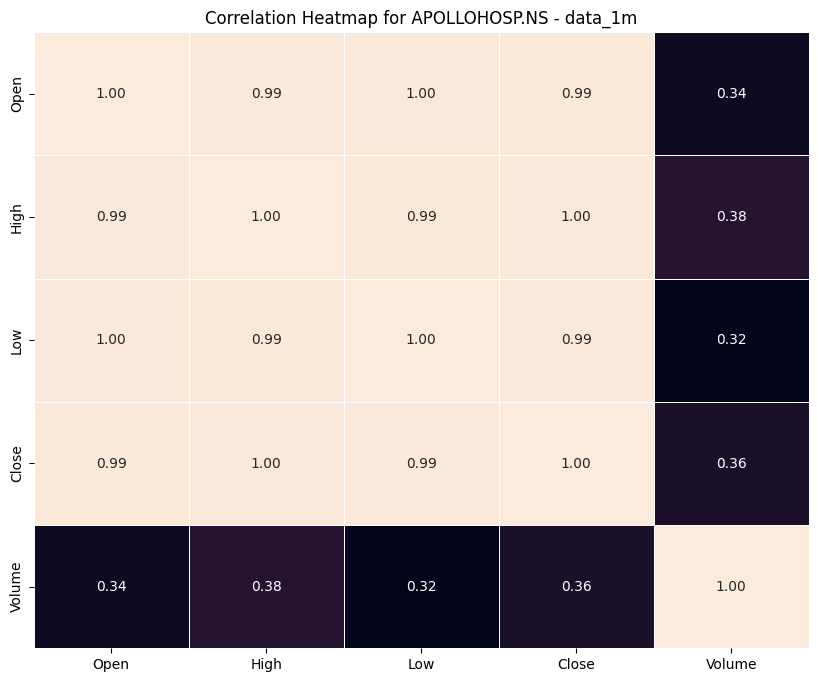


Correlation Heatmap for data_2m - Selected Symbols:



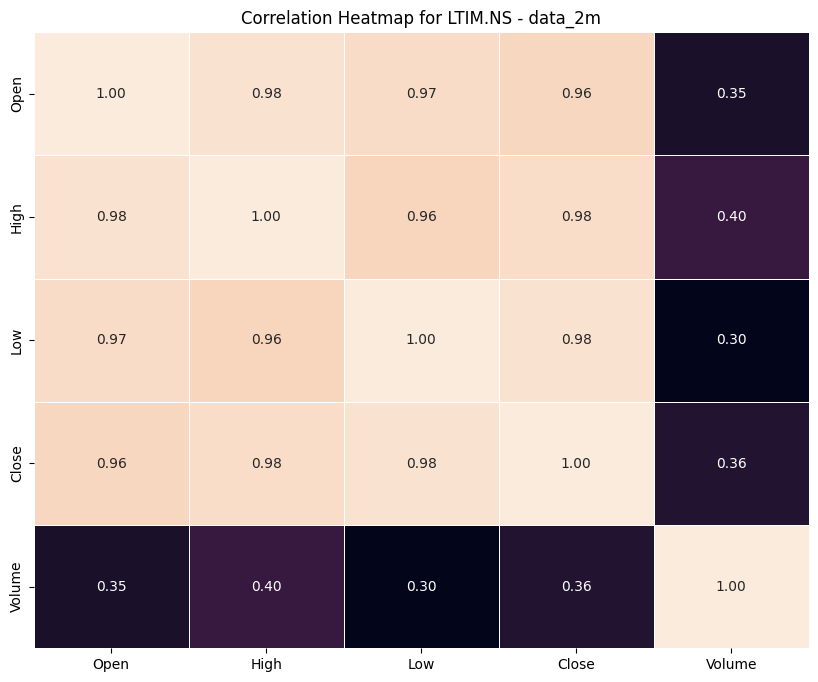

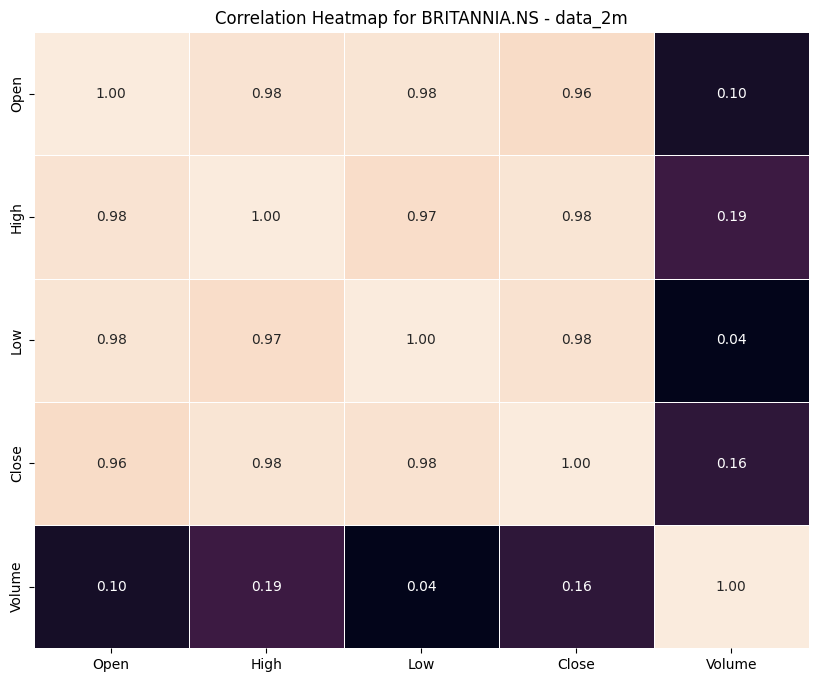

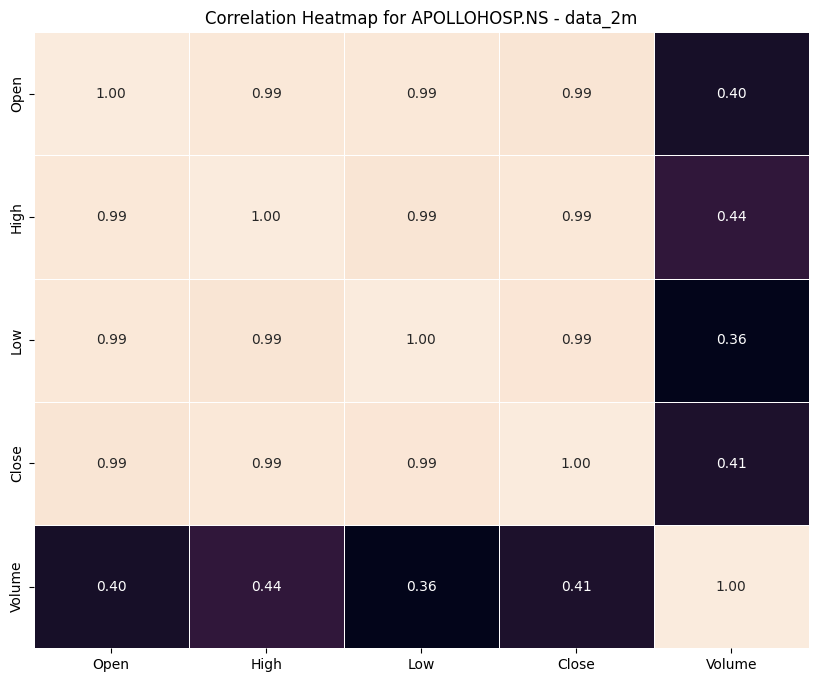


Correlation Heatmap for data_5m - Selected Symbols:



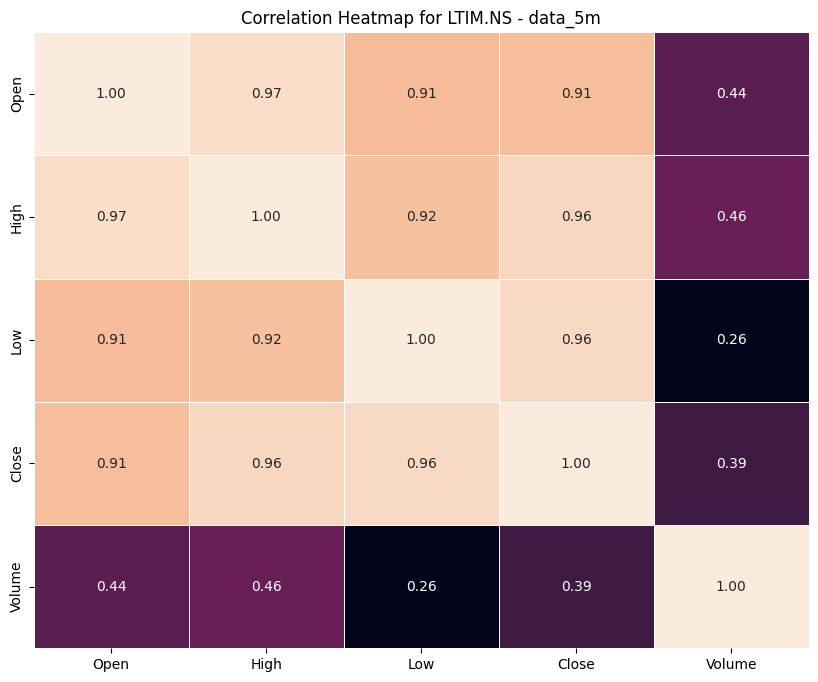

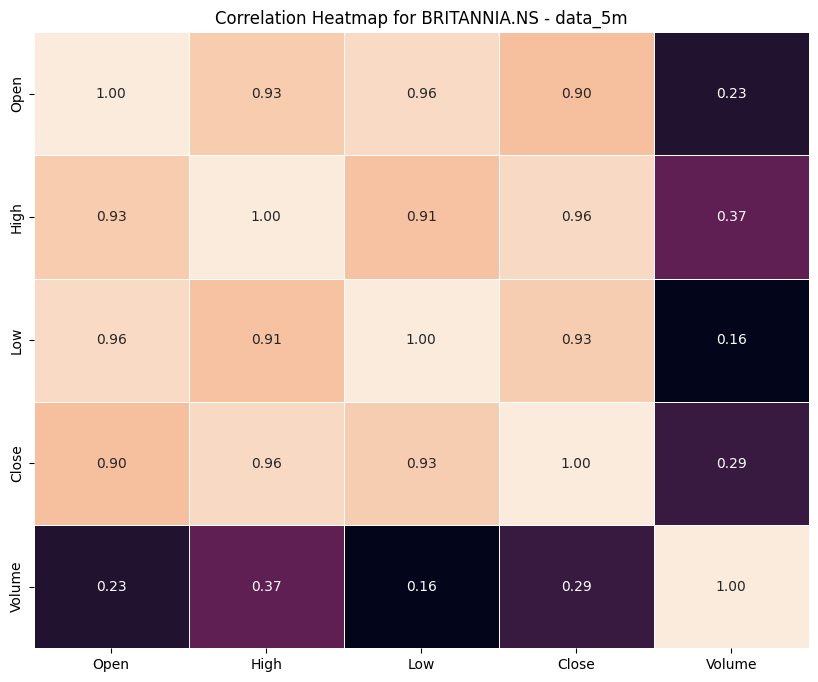

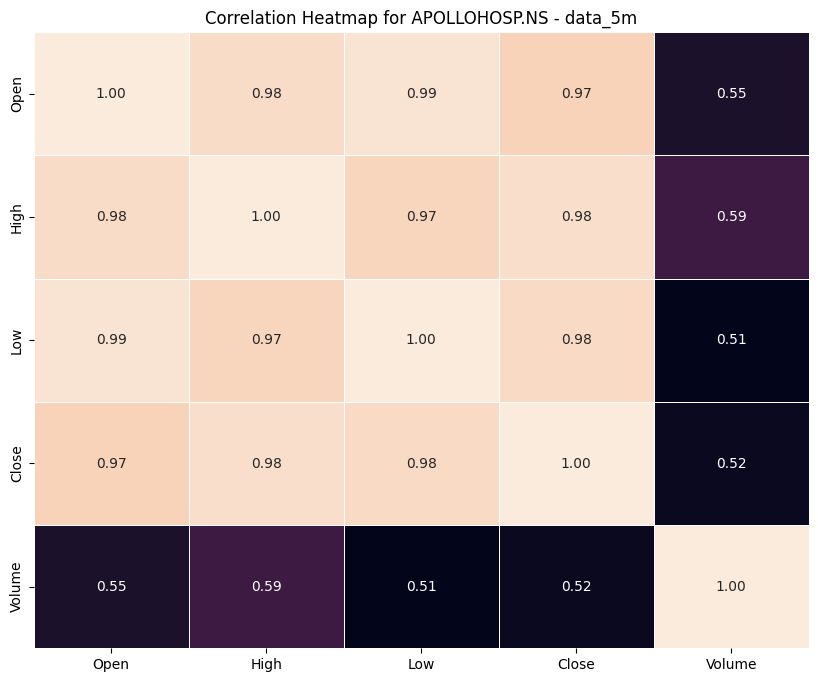


Correlation Heatmap for data_15m - Selected Symbols:



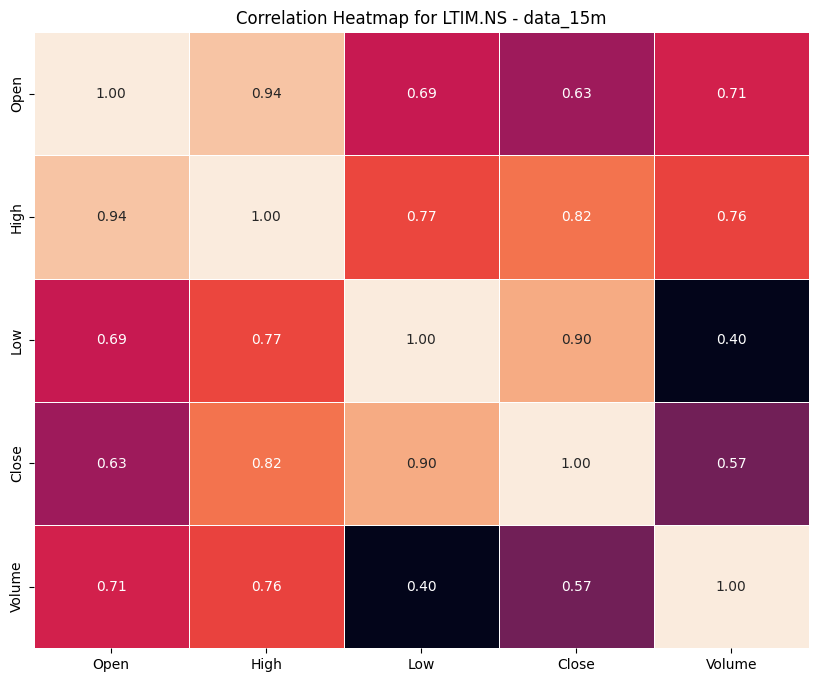

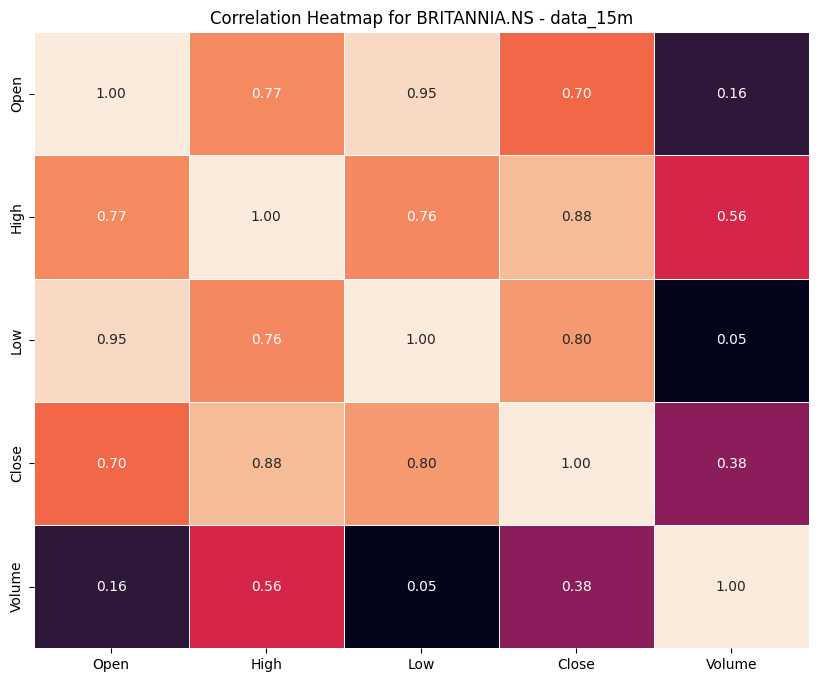

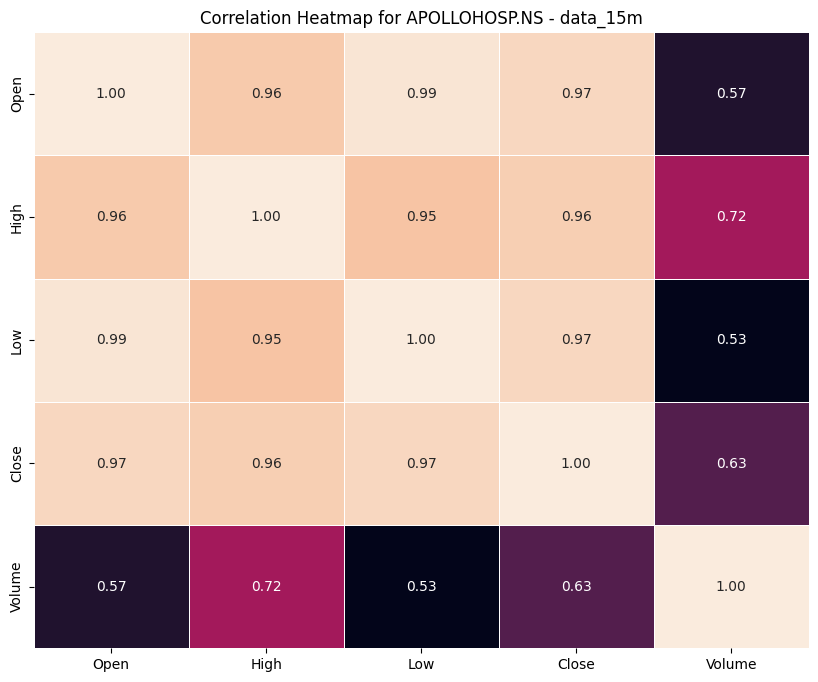


Correlation Heatmap for data_60m - Selected Symbols:



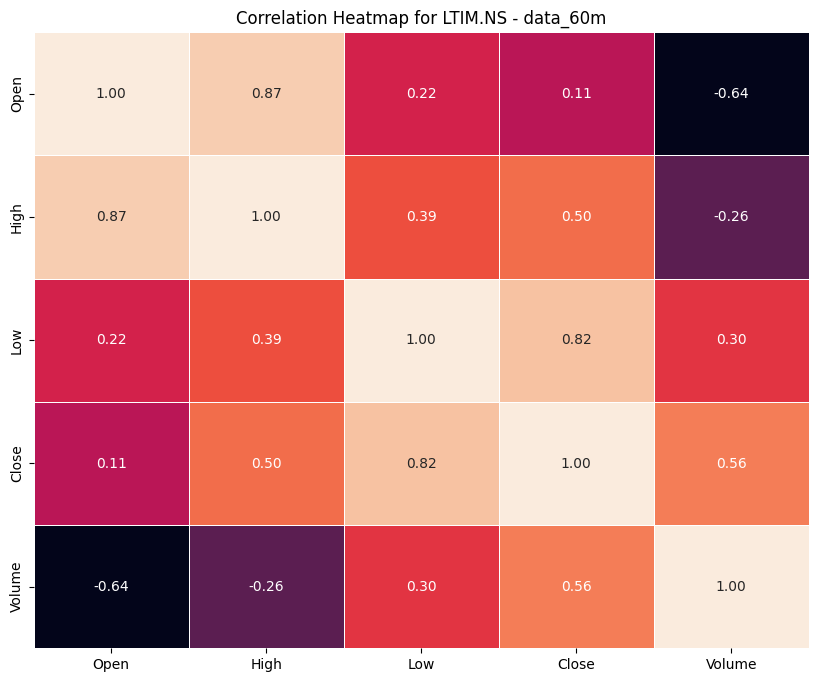

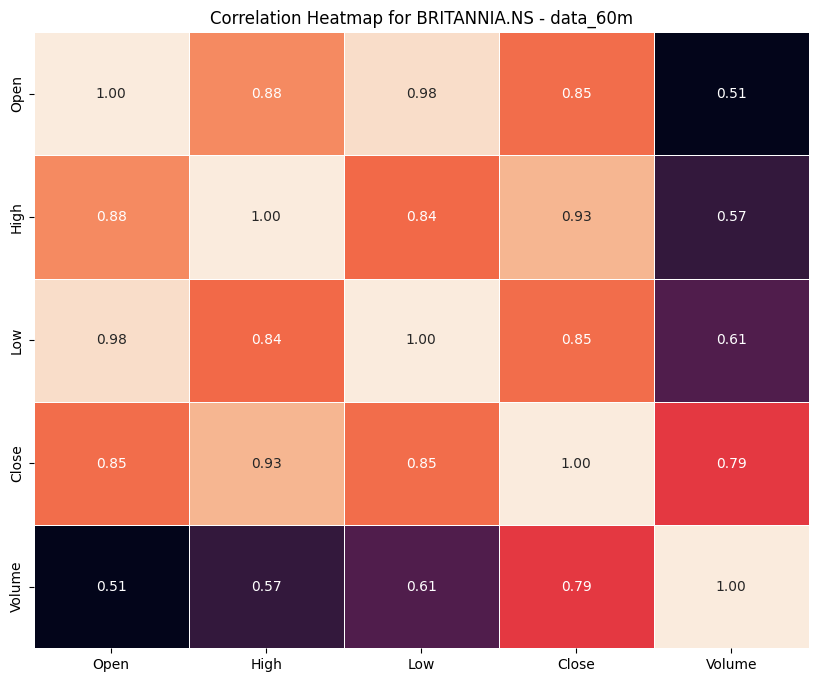

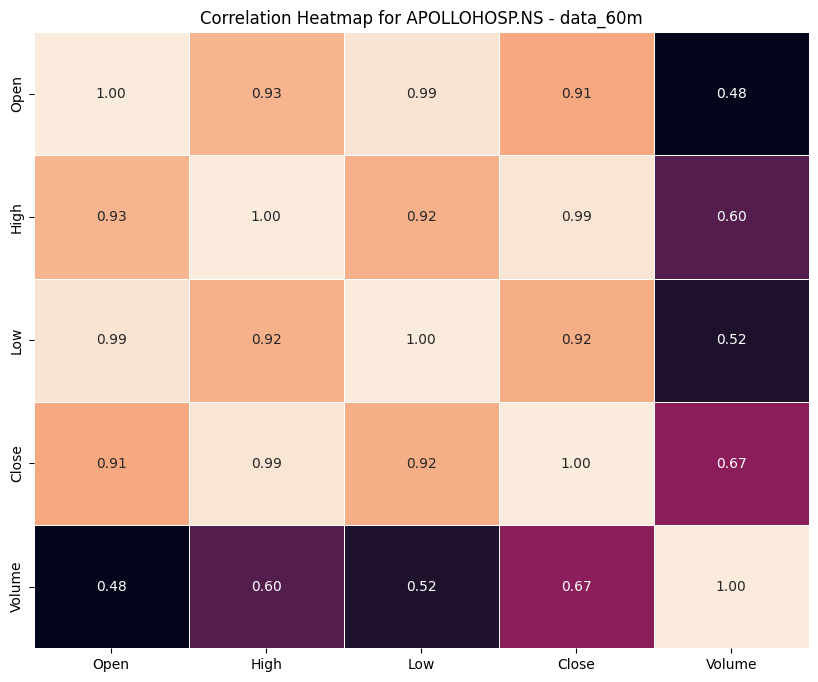

In [14]:
# Correlation heatmap for each DataFrame and selected symbols
for df_name, df in zip(['data_1m', 'data_2m', 'data_5m', 'data_15m', 'data_60m'], [data_1m, data_2m, data_5m, data_15m, data_60m]):
    print(f"\nCorrelation Heatmap for {df_name} - Selected Symbols:\n")

    for symbol in selected_symbols:
        selected_data = df[df['Symbol'] == symbol]

        # Compute the correlation matrix
        correlation_matrix = selected_data[columns_of_interest].corr()

        # Plot the correlation matrix as a heatmap without the color bar
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5, cbar=False)
        plt.title(f'Correlation Heatmap for {symbol} - {df_name}')
        plt.show()

In [15]:
# List of stock symbols for testing from US market
test_symbols = ['SPY', 'QQQ', 'X']

# List of intervals
intervals = ['1m', '2m', '5m', '15m', '60m']

# Download historical data for each symbol and interval
data_test_dict = {}

for symbol in test_symbols:
    for interval in intervals:
        ticker = f'{symbol}'
        data = yf.download(ticker, period='1d', interval=interval)
        data_test_dict[f'{symbol}_{interval}'] = data

# Create separate DataFrames for each interval
data_test_1m = pd.concat([data_test_dict[f'SPY_1m'], data_test_dict[f'QQQ_1m'], data_test_dict[f'X_1m']], keys=['SPY', 'QQQ', 'X'])
data_test_2m = pd.concat([data_test_dict[f'SPY_2m'], data_test_dict[f'QQQ_2m'], data_test_dict[f'X_2m']], keys=['SPY', 'QQQ', 'X'])
data_test_5m = pd.concat([data_test_dict[f'SPY_5m'], data_test_dict[f'QQQ_5m'], data_test_dict[f'X_5m']], keys=['SPY', 'QQQ', 'X'])
data_test_15m = pd.concat([data_test_dict[f'SPY_15m'], data_test_dict[f'QQQ_15m'], data_test_dict[f'X_15m']], keys=['SPY', 'QQQ', 'X'])
data_test_60m = pd.concat([data_test_dict[f'SPY_60m'], data_test_dict[f'QQQ_60m'], data_test_dict[f'X_60m']], keys=['SPY', 'QQQ', 'X'])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [16]:
data_test_1m

Open        High         Low       Close  \
    Datetime                                                                    
SPY 2024-01-19 09:30:00-05:00  477.649994  477.970001  477.390015  477.420013   
    2024-01-19 09:31:00-05:00  477.390015  477.649994  477.190002  477.279999   
    2024-01-19 09:32:00-05:00  477.290009  477.500000  477.234985  477.489990   
    2024-01-19 09:33:00-05:00  477.480011  477.570007  477.404999  477.470001   
    2024-01-19 09:34:00-05:00  477.480011  477.559998  477.260010  477.285004   
...                                   ...         ...         ...         ...   
X   2024-01-19 15:55:00-05:00   47.750000   47.750000   47.705002   47.744999   
    2024-01-19 15:56:00-05:00   47.744999   47.750000   47.730000   47.750000   
    2024-01-19 15:57:00-05:00   47.750000   47.750000   47.730000   47.750000   
    2024-01-19 15:58:00-05:00   47.750000   47.750000   47.730000   47.744999   
    2024-01-19 15:59:00-05:00   47.744999   47.860001   47.730000   47.840000   

                                Adj Close   Volume  
    Datetime                                        
SPY 2024-01-19 09:30:00-05:00  477.420013  3052837  
    2024-01-19 09:31:00-05:00  477.279999   558866  
    2024-01-19 09:32:00-05:00  477.489990   231743  
    2024-01-19 09:33:00-05:00  477.470001   254883  
    2024-01-19 09:34:00-05:00  477.285004   269353  
...                                   ...      ...  
X   2024-01-19 15:55:00-05:00   47.744999    32384  
    2024-01-19 15:56:00-05:00   47.750000    21281  
    2024-01-19 15:57:00-05:00   47.750000    15585  
    2024-01-19 15:58:00-05:00   47.744999    31004  
    2024-01-19 15:59:00-05:00   47.840000   142749  

[1169 rows x 6 columns]